In [1]:
import pandas as pd

from tensorflow import keras
from keras import layers

from src.utils import(
    read_data,
    train_model, 
    calculate_average_measures, 
    print_testing_loss_accuracy
)

from src.preprocessing import Preprocessor
from src.plotting import PlottingManager

In [2]:
def build_doc2vec_model() -> keras.models.Sequential:
    """
    Construct and compile a Doc2Vec binary classifier.

    Returns:
    --------
    - model : keras.models.Sequential
        A compiled model that will be trained later.
    """
    
    model = keras.Sequential([
        layers.Dense(200, activation="relu"),
        layers.Dropout(0.1),
        layers.BatchNormalization(),
        layers.Dense(200, activation="relu"),
        layers.Dropout(0.1),
        layers.BatchNormalization(),
        layers.Dense(100, activation="relu"),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Dense(100, activation="relu"), 
        layers.Dropout(0.3),
        layers.BatchNormalization(),
        layers.Dense(1, activation="sigmoid"),   
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [3]:
X_train, X_test, y_train, y_test = read_data()

In [4]:
preprocessor = Preprocessor()
plotter = PlottingManager()

In [5]:
embeddings_doc2vec_1, X_train_vectors_1 = preprocessor.convert_text_to_vectors_doc2vec(X_train["Facts"],)

In [6]:
X_test_vectors_1 = preprocessor.convert_text_to_vectors_doc2vec(X_test["Facts"], train=False, embeddings_doc2vec=embeddings_doc2vec_1)

In [7]:
all_models_1, all_losses_1, all_val_losses_1, all_accuracies_1, all_val_accuracies_1 = train_model(build_doc2vec_model, X_train_vectors_1, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 3s 17ms/step - loss: 0.6815 - accuracy: 0.6450 - val_loss: 0.5736 - val_accuracy: 0.6936
Epoch 2/30
33/33 [==============================] - 0s 9ms/step - loss: 0.4532 - accuracy: 0.7845 - val_loss: 0.4574 - val_accuracy: 0.8208
Epoch 3/30
33/33 [==============================] - 0s 9ms/step - loss: 0.3183 - accuracy: 0.8615 - val_loss: 0.4074 - val_accuracy: 0.8324
Epoch 4/30
33/33 [==============================] - 0s 8ms/step - loss: 0.2452 - accuracy: 0.9062 - val_loss: 0.4265 - val_accuracy: 0.8078
Epoch 5/30
33/33 [==============================] - 0s 9ms/step - loss: 0.2065 - accuracy: 0.9206 - val_loss: 0.4245 - val_accuracy: 0.8165
Epoch 6/30
33/33 [==============================] - 0s 8ms/step - loss: 0.1603 - accuracy: 0.9384 - val_loss: 0.4132 - val_accuracy: 0.8251
Epoch 7/30
33/33 [==============================] - 0s 9ms/step - loss: 0.1408 - accuracy: 0.9490 - val_loss: 0.4409 - val_accuracy: 0.8324
Epoch 8/30


In [8]:
avg_loss_hist_1, avg_val_loss_hist_1, avg_acc_hist_1, avg_val_acc_hist_1 = calculate_average_measures(all_losses_1, all_val_losses_1, all_accuracies_1, all_val_accuracies_1)

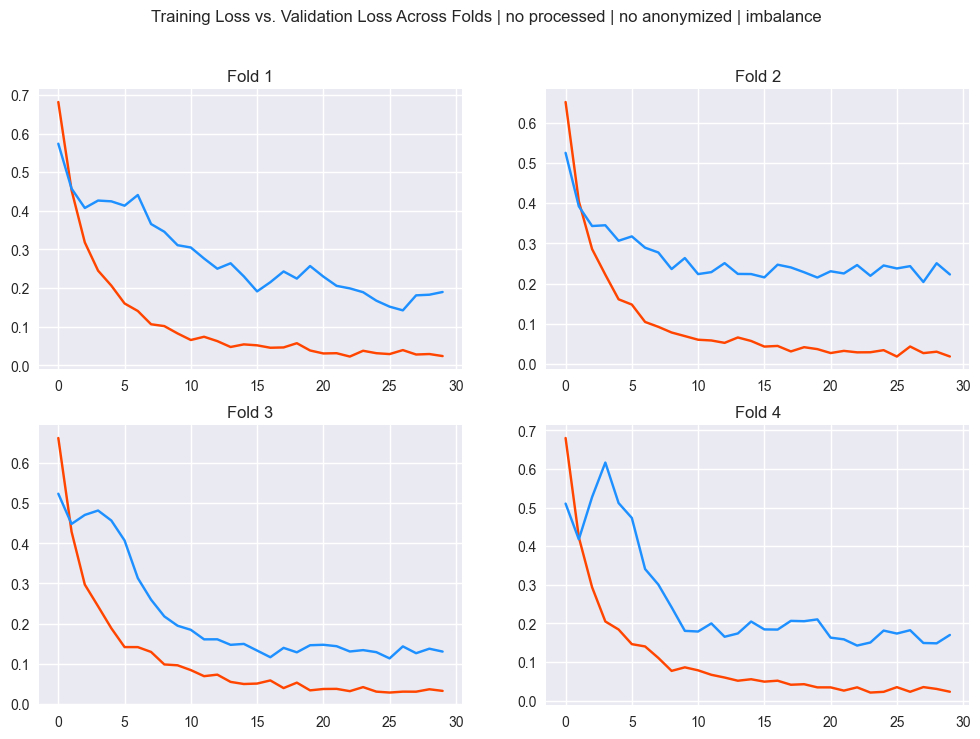

In [9]:
plotter.plot_subplots_curve(all_losses_1, all_val_losses_1, "Training Loss vs. Validation Loss Across Folds | no processed | no anonymized | imbalance ")

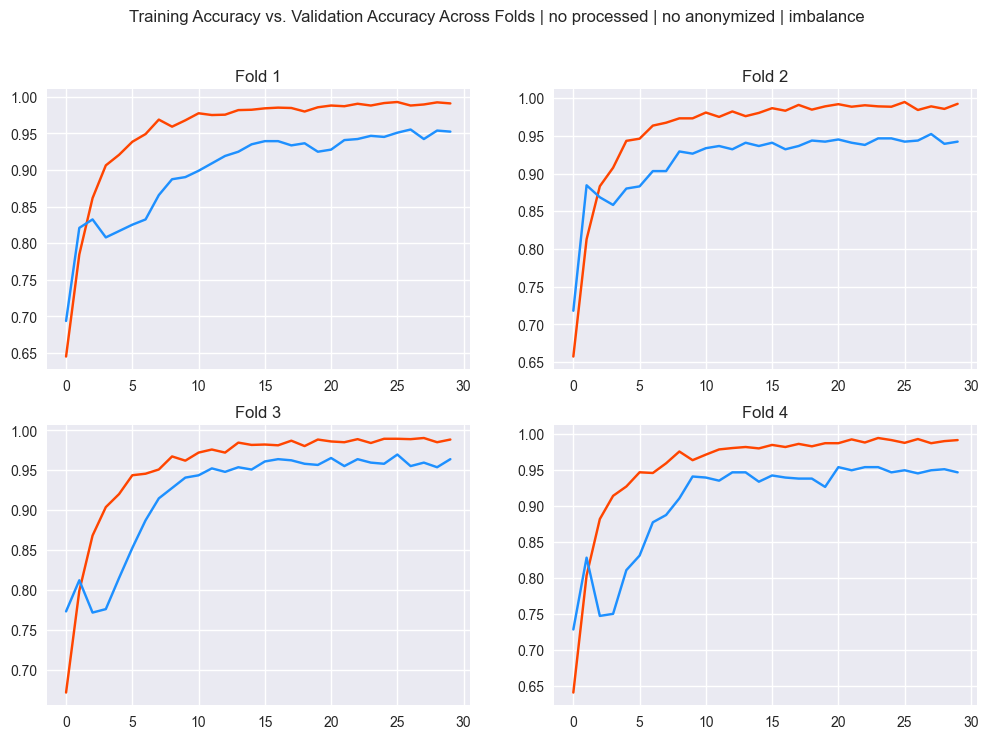

In [10]:
plotter.plot_subplots_curve(all_accuracies_1, all_val_accuracies_1, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | no anonymized | imbalance")

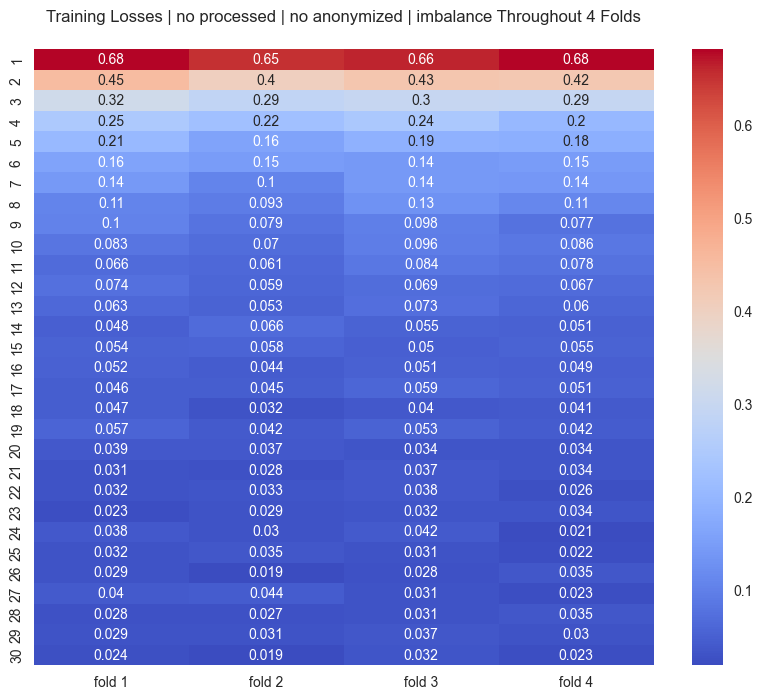

In [11]:
plotter.plot_heatmap(all_losses_1, "Training Losses | no processed | no anonymized | imbalance")

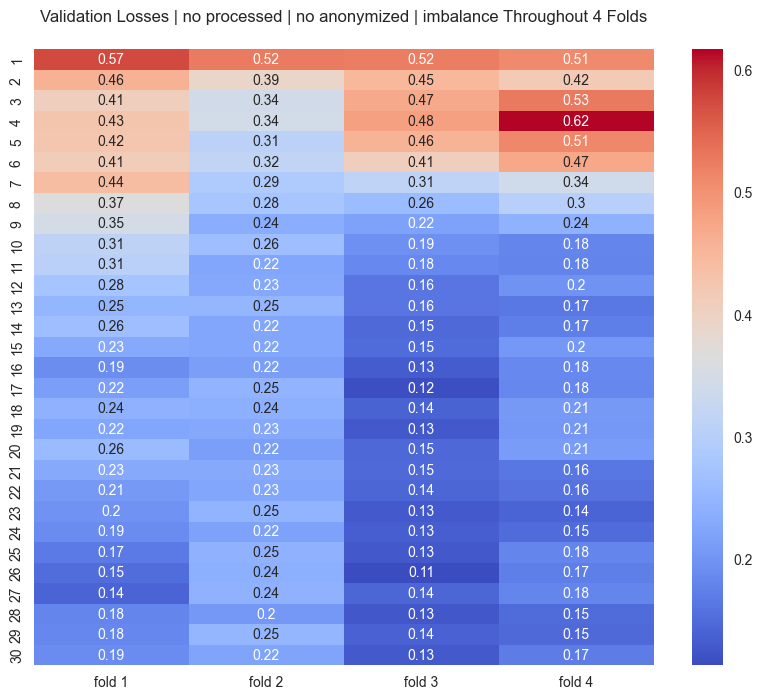

In [12]:
plotter.plot_heatmap(all_val_losses_1, "Validation Losses | no processed | no anonymized | imbalance")

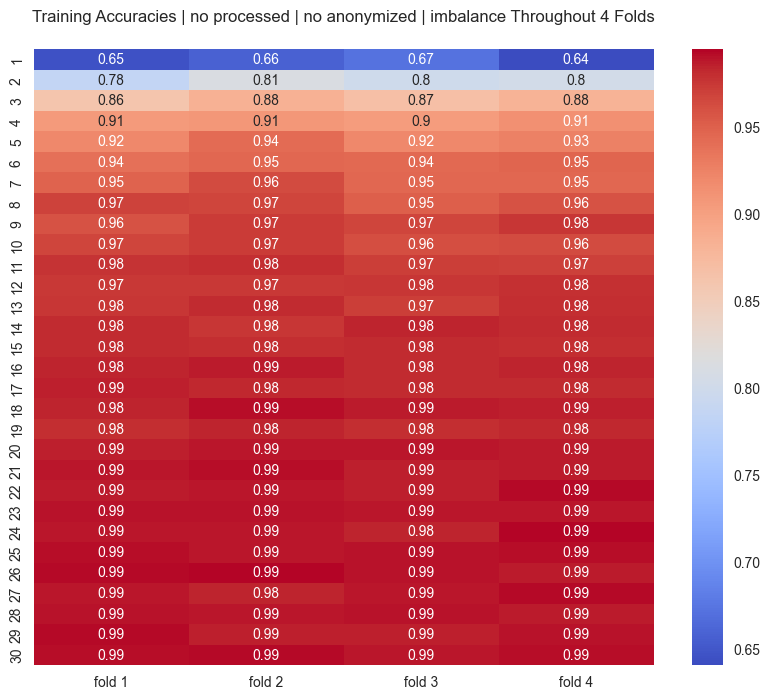

In [13]:
plotter.plot_heatmap(all_accuracies_1, "Training Accuracies | no processed | no anonymized | imbalance")

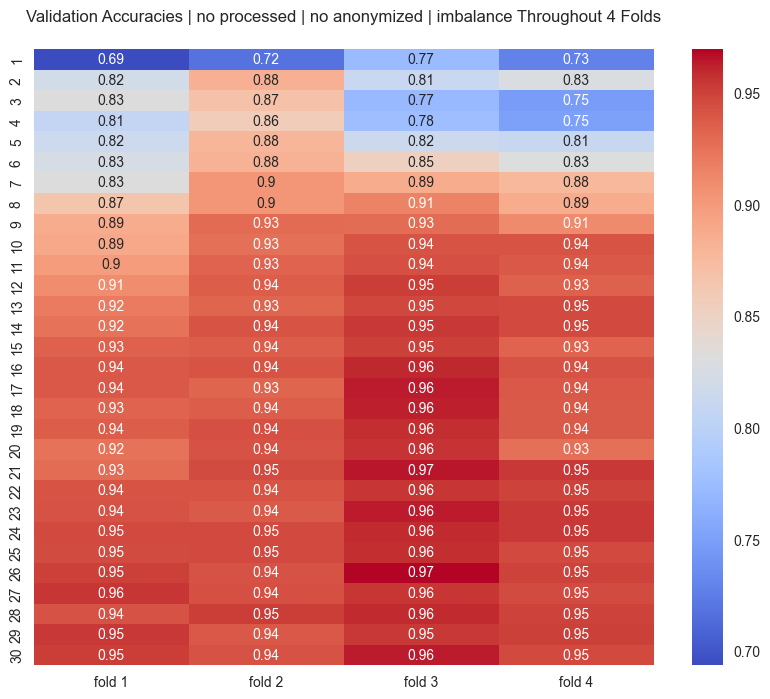

In [14]:
plotter.plot_heatmap(all_val_accuracies_1, "Validation Accuracies | no processed | no anonymized | imbalance")

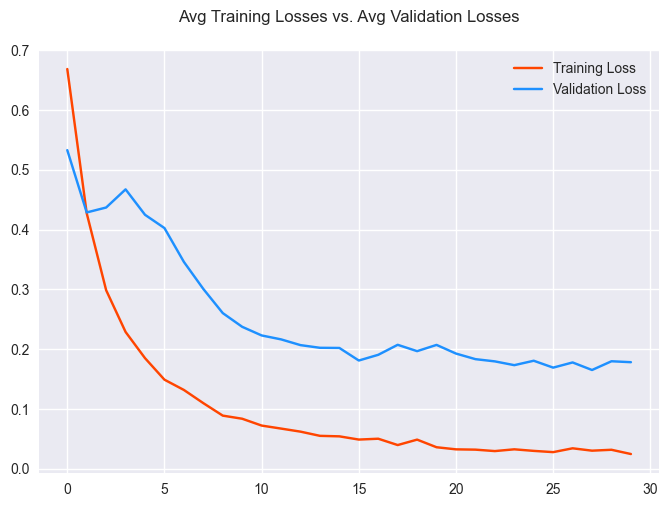

In [15]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_1, avg_val_loss_hist_1, "Training Loss", "Validation Loss")

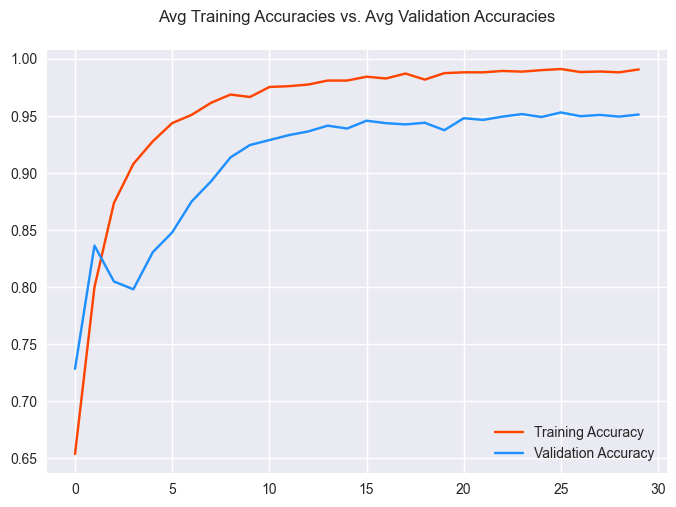

In [16]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_1, avg_val_acc_hist_1, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 0s 2ms/step


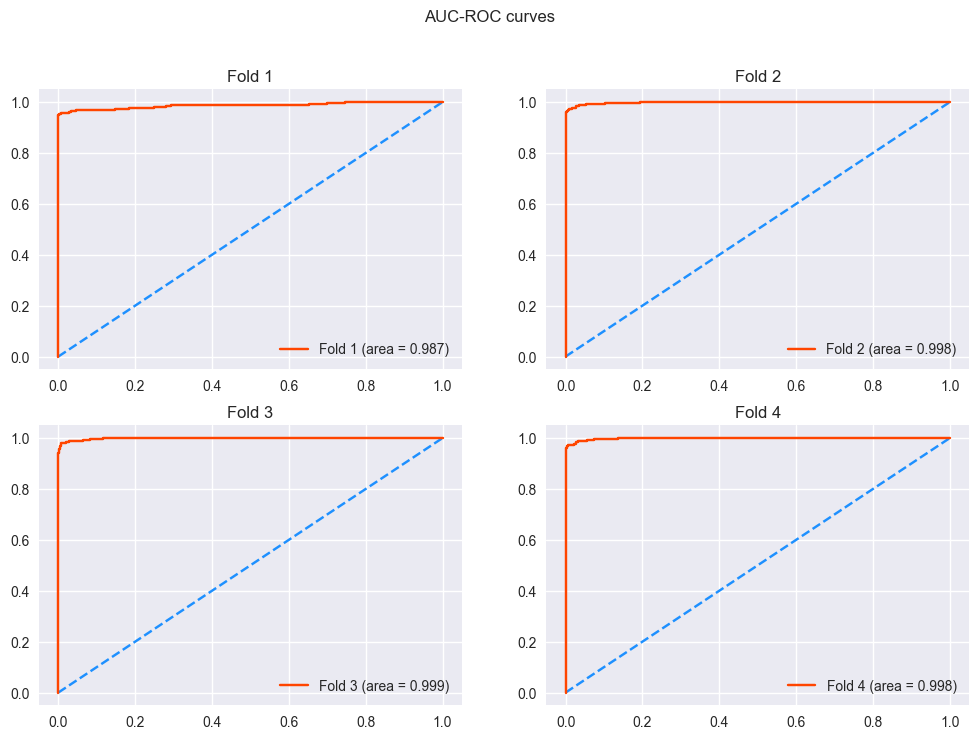

In [17]:
plotter.plot_roc_curve(all_models_1, X_test_vectors_1, y_test)

22/22 [==============================] - 0s 2ms/step


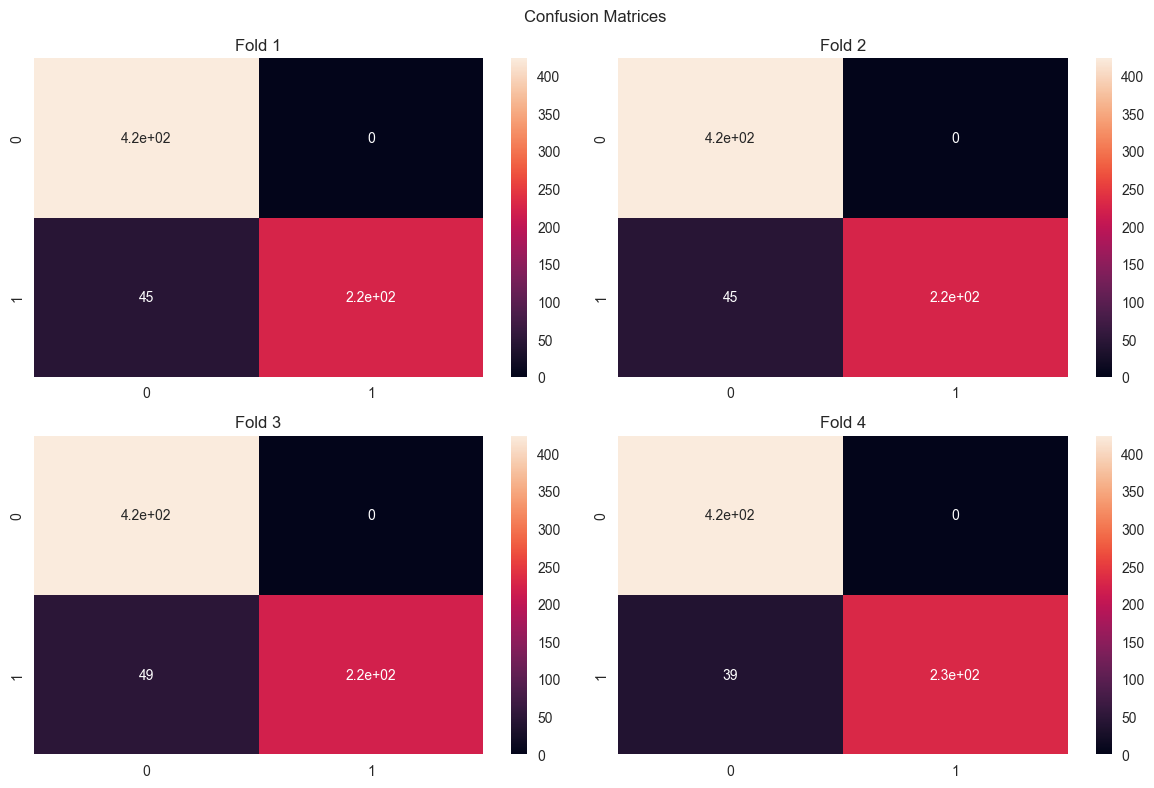

In [18]:
plotter.plot_confusion_matrix(all_models_1, X_test_vectors_1, y_test)

In [19]:
for i, trained_model in enumerate(all_models_1):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_1, y_test))

Model 1:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       423
           1       1.00      0.83      0.91       270

    accuracy                           0.94       693
   macro avg       0.95      0.92      0.93       693
weighted avg       0.94      0.94      0.93       693

Model 2:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       423
           1       1.00      0.83      0.91       270

    accuracy                           0.94       693
   macro avg       0.95      0.92      0.93       693
weighted avg       0.94      0.94      0.93       693

Model 3:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       423
           1       1.00      0.82      0.90       2

In [20]:
print_testing_loss_accuracy(all_models_1, X_test_vectors_1, y_test)

model: 1
22/22 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.9351
model: 2
22/22 [==============================] - 0s 3ms/step - loss: 0.3217 - accuracy: 0.9351
model: 3
22/22 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.9293
model: 4
22/22 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.9437
average testing loss: 0.309
average testing accuracy: 0.936


### Combination 2: (No Processing - No Anonymization - Balancing)

In [21]:
balanced_df = preprocessor.balance_data(X_train["Facts"], y_train)
X_train_balanced = balanced_df["Facts"]
y_train_balanced = balanced_df["winner_index"]

In [22]:
embeddings_doc2vec_2, X_train_vectors_2 = preprocessor.convert_text_to_vectors_doc2vec(X_train_balanced)

In [23]:
X_test_vectors_2 = preprocessor.convert_text_to_vectors_doc2vec(X_test["Facts"], train=False, embeddings_doc2vec=embeddings_doc2vec_2)

In [24]:
all_models_2, all_losses_2, all_val_losses_2, all_accuracies_2, all_val_accuracies_2 = train_model(build_doc2vec_model, X_train_vectors_2, y_train_balanced)

fold: 1
Epoch 1/30
40/40 [==============================] - 3s 14ms/step - loss: 0.4942 - accuracy: 0.7603 - val_loss: 0.3898 - val_accuracy: 0.9006
Epoch 2/30
40/40 [==============================] - 0s 9ms/step - loss: 0.2361 - accuracy: 0.9074 - val_loss: 0.3094 - val_accuracy: 0.8509
Epoch 3/30
40/40 [==============================] - 0s 8ms/step - loss: 0.1348 - accuracy: 0.9562 - val_loss: 0.3246 - val_accuracy: 0.8438
Epoch 4/30
40/40 [==============================] - 0s 9ms/step - loss: 0.1090 - accuracy: 0.9649 - val_loss: 0.2589 - val_accuracy: 0.8911
Epoch 5/30
40/40 [==============================] - 0s 9ms/step - loss: 0.0869 - accuracy: 0.9693 - val_loss: 0.2137 - val_accuracy: 0.9148
Epoch 6/30
40/40 [==============================] - 0s 9ms/step - loss: 0.0803 - accuracy: 0.9693 - val_loss: 0.1572 - val_accuracy: 0.9408
Epoch 7/30
40/40 [==============================] - 0s 9ms/step - loss: 0.0555 - accuracy: 0.9815 - val_loss: 0.1495 - val_accuracy: 0.9550
Epoch 8/30


In [25]:
avg_loss_hist_2, avg_val_loss_hist_2, avg_acc_hist_2, avg_val_acc_hist_2 = calculate_average_measures(all_losses_2, all_val_losses_2, all_accuracies_2, all_val_accuracies_2)

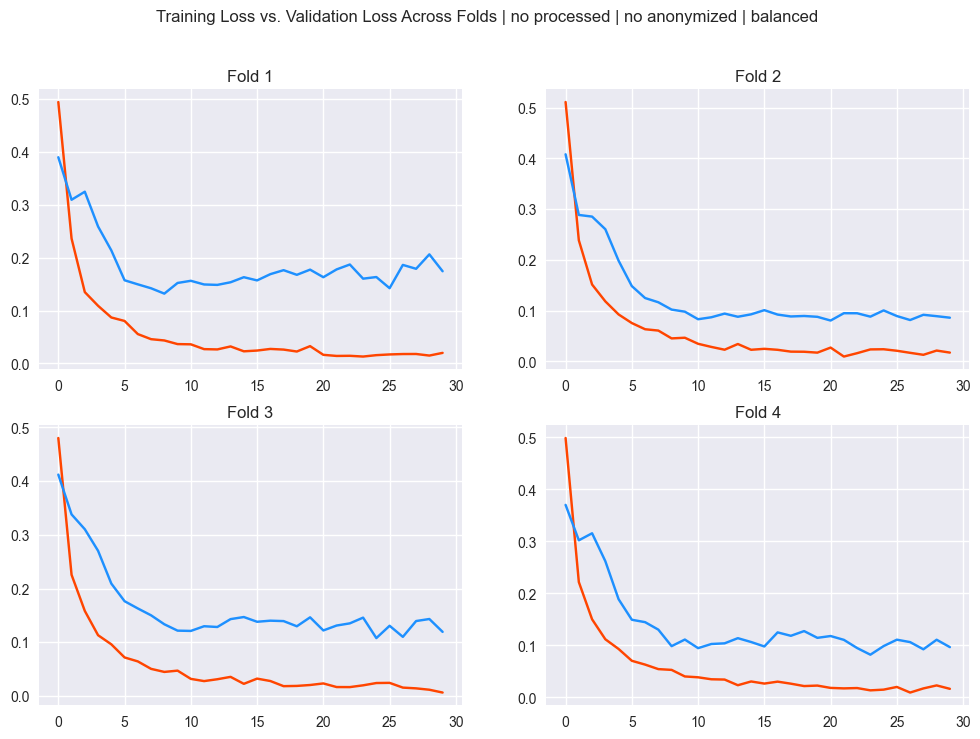

In [26]:
plotter.plot_subplots_curve(all_losses_2, all_val_losses_2, "Training Loss vs. Validation Loss Across Folds | no processed | no anonymized | balanced ")

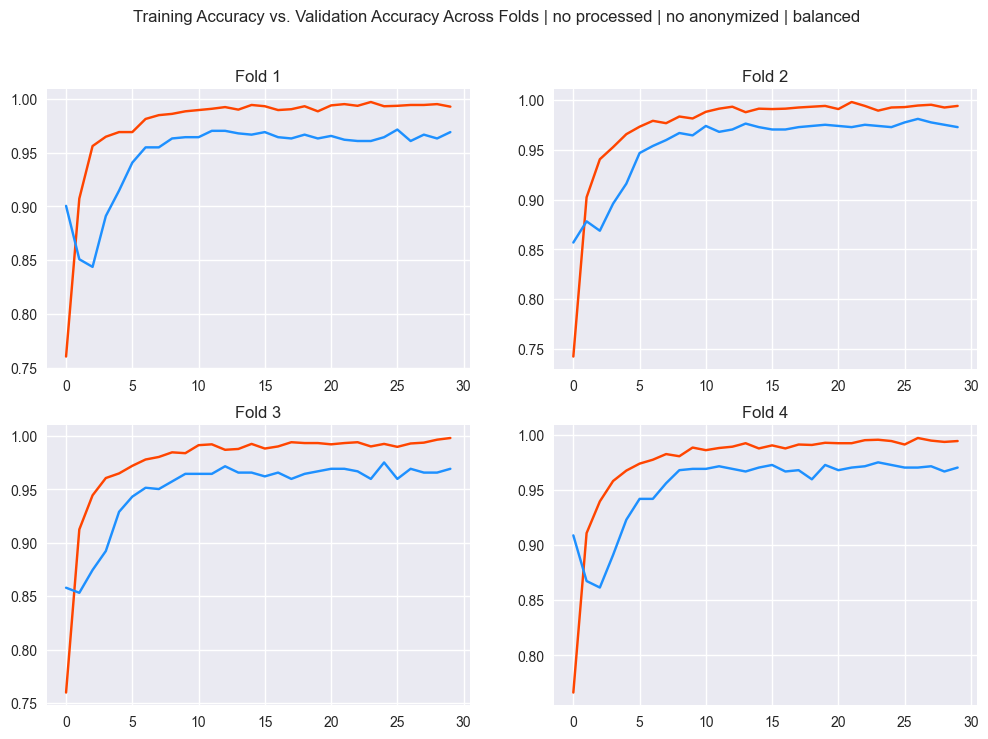

In [27]:
plotter.plot_subplots_curve(all_accuracies_2, all_val_accuracies_2, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | no anonymized | balanced")

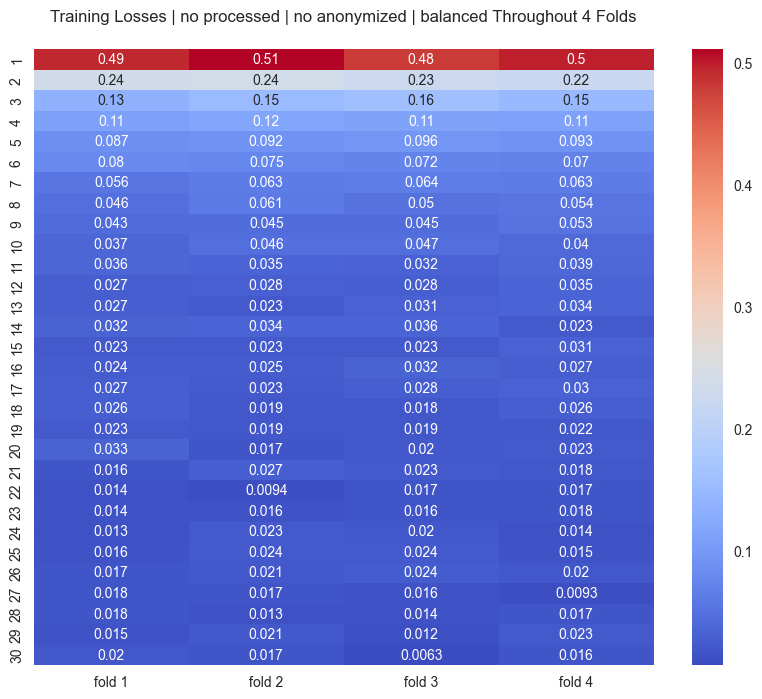

In [28]:
plotter.plot_heatmap(all_losses_2, "Training Losses | no processed | no anonymized | balanced")

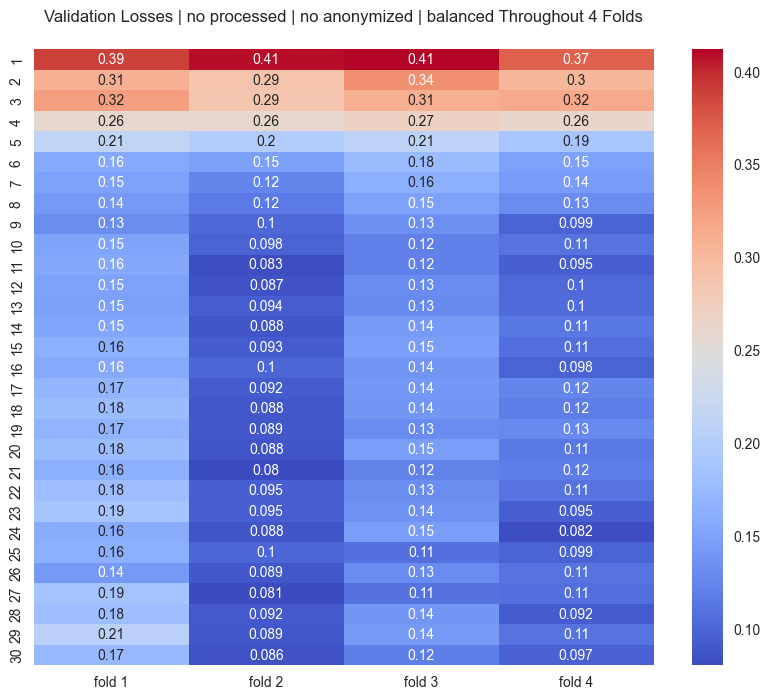

In [29]:
plotter.plot_heatmap(all_val_losses_2, "Validation Losses | no processed | no anonymized | balanced")

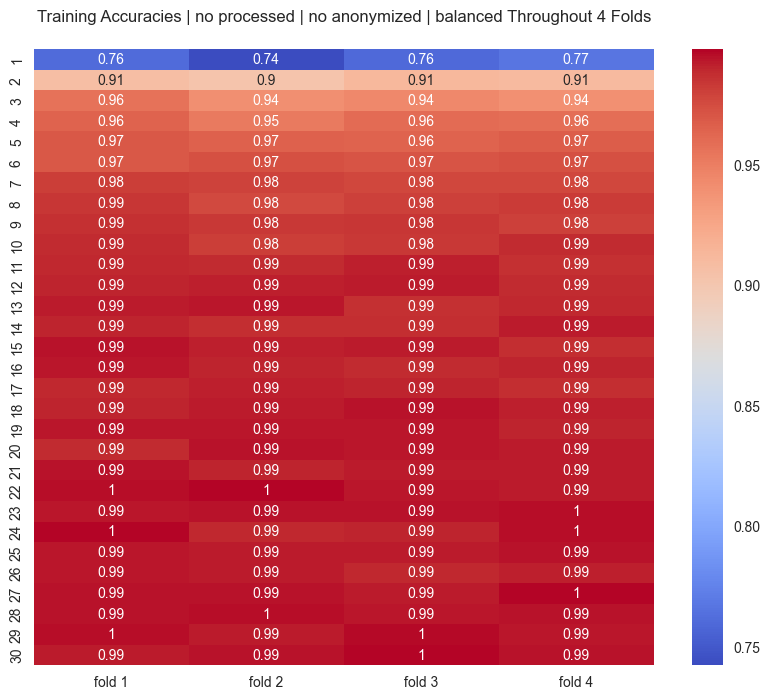

In [30]:
plotter.plot_heatmap(all_accuracies_2, "Training Accuracies | no processed | no anonymized | balanced")

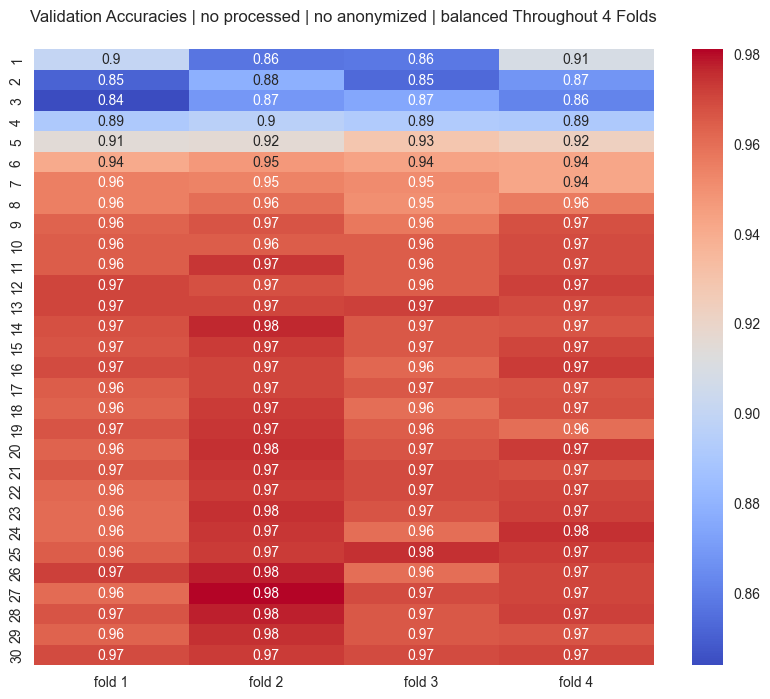

In [31]:
plotter.plot_heatmap(all_val_accuracies_2, "Validation Accuracies | no processed | no anonymized | balanced")

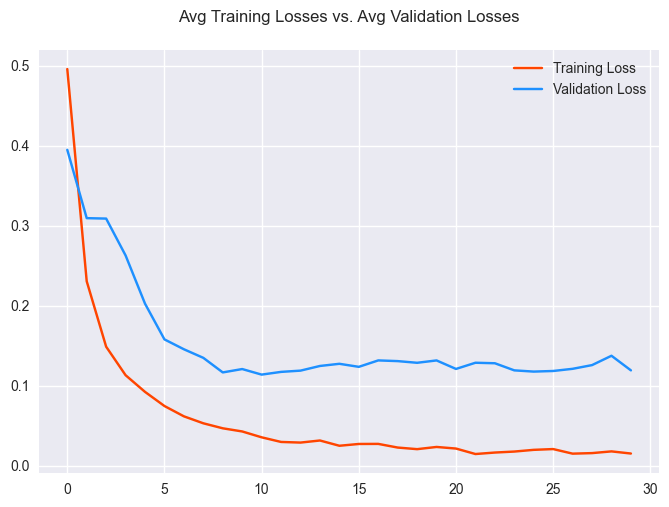

In [32]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_2, avg_val_loss_hist_2, "Training Loss", "Validation Loss")

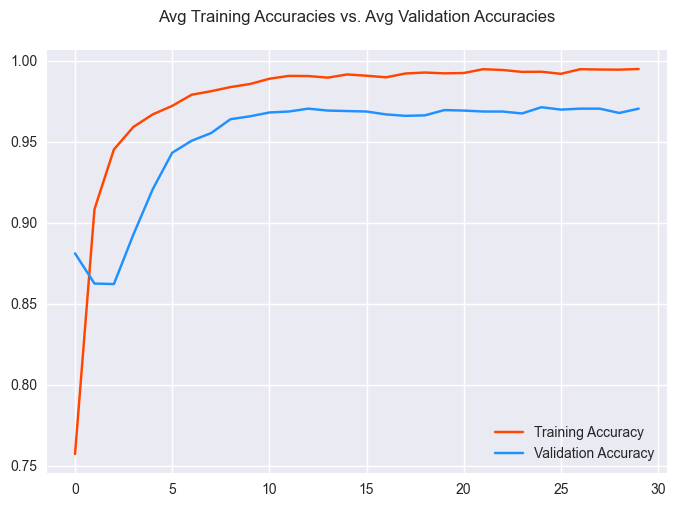

In [33]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_2, avg_val_acc_hist_2, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 0s 2ms/step


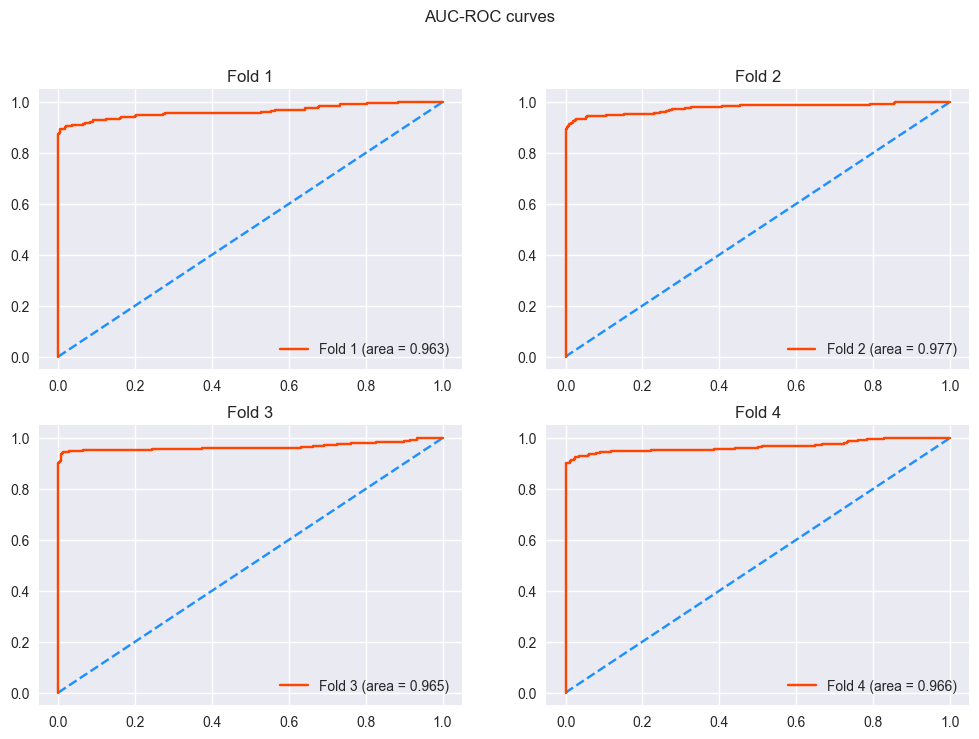

In [34]:
plotter.plot_roc_curve(all_models_2, X_test_vectors_2, y_test)

22/22 [==============================] - 0s 2ms/step


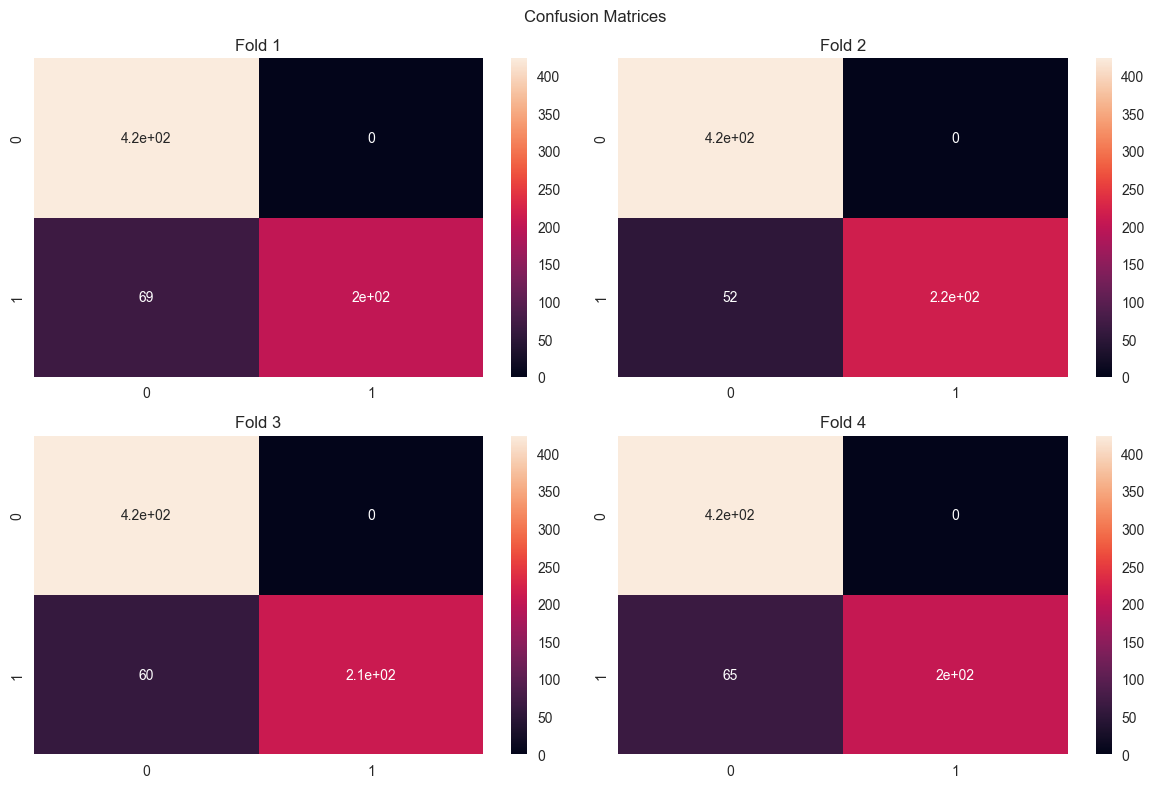

In [35]:
plotter.plot_confusion_matrix(all_models_2, X_test_vectors_2, y_test)

In [36]:
for i, trained_model in enumerate(all_models_2):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_2, y_test))

Model 1:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       423
           1       1.00      0.74      0.85       270

    accuracy                           0.90       693
   macro avg       0.93      0.87      0.89       693
weighted avg       0.91      0.90      0.90       693

Model 2:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       423
           1       1.00      0.81      0.89       270

    accuracy                           0.92       693
   macro avg       0.95      0.90      0.92       693
weighted avg       0.93      0.92      0.92       693

Model 3:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       423
           1       1.00      0.78      0.88       2

In [37]:
print_testing_loss_accuracy(all_models_2, X_test_vectors_2, y_test)

model: 1
22/22 [==============================] - 0s 3ms/step - loss: 0.9098 - accuracy: 0.9004
model: 2
22/22 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.9250
model: 3
22/22 [==============================] - 0s 3ms/step - loss: 0.7359 - accuracy: 0.9134
model: 4
22/22 [==============================] - 0s 2ms/step - loss: 0.7786 - accuracy: 0.9062
average testing loss: 0.780
average testing accuracy: 0.911


### Combination 3: (No Processing - Anonymization - Imbalancing)

In [38]:
first_party_names_3 = X_train["first_party"]
second_party_names_3 = X_train["second_party"]
facts_3 = X_train["Facts"]

In [39]:
test_first_party_names_3 = X_test["first_party"]
test_second_party_names_3 = X_test["second_party"]
test_facts_3 = X_test["Facts"]

In [40]:
anonymized_facts_3 = preprocessor.anonymize_data(first_party_names_3, second_party_names_3, facts_3)
test_anonymized_facts_3 = preprocessor.anonymize_data(test_first_party_names_3, test_second_party_names_3, test_facts_3)

In [41]:
embeddings_doc2vec_3, X_train_vectors_3 = preprocessor.convert_text_to_vectors_doc2vec(anonymized_facts_3)

In [42]:
X_test_vectors_3 = preprocessor.convert_text_to_vectors_doc2vec(test_anonymized_facts_3, train=False, embeddings_doc2vec=embeddings_doc2vec_3)

In [43]:
all_models_3, all_losses_3, all_val_losses_3, all_accuracies_3, all_val_accuracies_3 = train_model(build_doc2vec_model, X_train_vectors_3, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 3s 16ms/step - loss: 0.7247 - accuracy: 0.5984 - val_loss: 0.5706 - val_accuracy: 0.7081
Epoch 2/30
33/33 [==============================] - 0s 10ms/step - loss: 0.4364 - accuracy: 0.7994 - val_loss: 0.4317 - val_accuracy: 0.8280
Epoch 3/30
33/33 [==============================] - 0s 9ms/step - loss: 0.3342 - accuracy: 0.8562 - val_loss: 0.4069 - val_accuracy: 0.8078
Epoch 4/30
33/33 [==============================] - 0s 8ms/step - loss: 0.2458 - accuracy: 0.8975 - val_loss: 0.4357 - val_accuracy: 0.8107
Epoch 5/30
33/33 [==============================] - 0s 9ms/step - loss: 0.2027 - accuracy: 0.9163 - val_loss: 0.4468 - val_accuracy: 0.8092
Epoch 6/30
33/33 [==============================] - 0s 9ms/step - loss: 0.1645 - accuracy: 0.9389 - val_loss: 0.3719 - val_accuracy: 0.8613
Epoch 7/30
33/33 [==============================] - 0s 9ms/step - loss: 0.1551 - accuracy: 0.9370 - val_loss: 0.3297 - val_accuracy: 0.8815
Epoch 8/30

In [44]:
avg_loss_hist_3, avg_val_loss_hist_3, avg_acc_hist_3, avg_val_acc_hist_3 = calculate_average_measures(all_losses_3, all_val_losses_3, all_accuracies_3, all_val_accuracies_3)

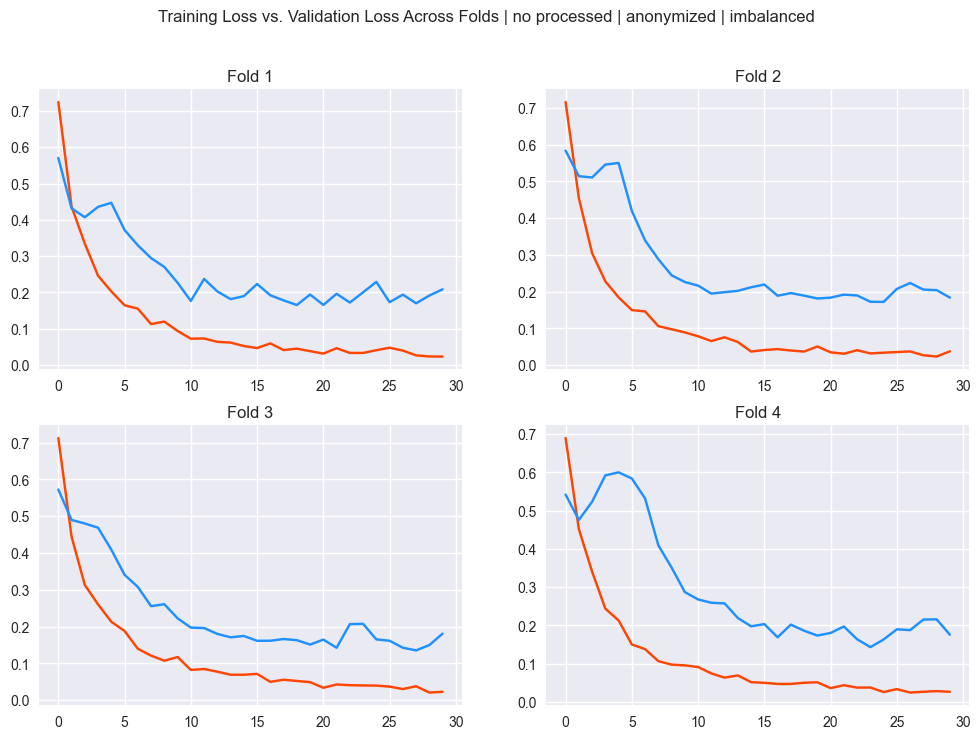

In [45]:
plotter.plot_subplots_curve(all_losses_3, all_val_losses_3, "Training Loss vs. Validation Loss Across Folds | no processed | anonymized | imbalanced ")

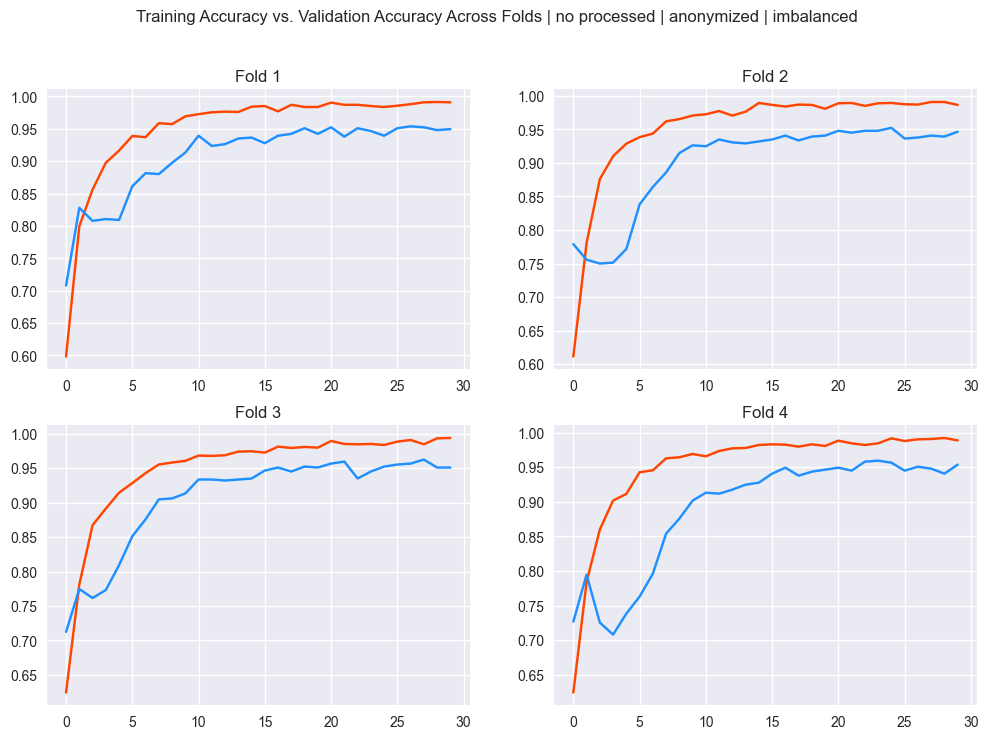

In [46]:
plotter.plot_subplots_curve(all_accuracies_3, all_val_accuracies_3, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | anonymized | imbalanced")

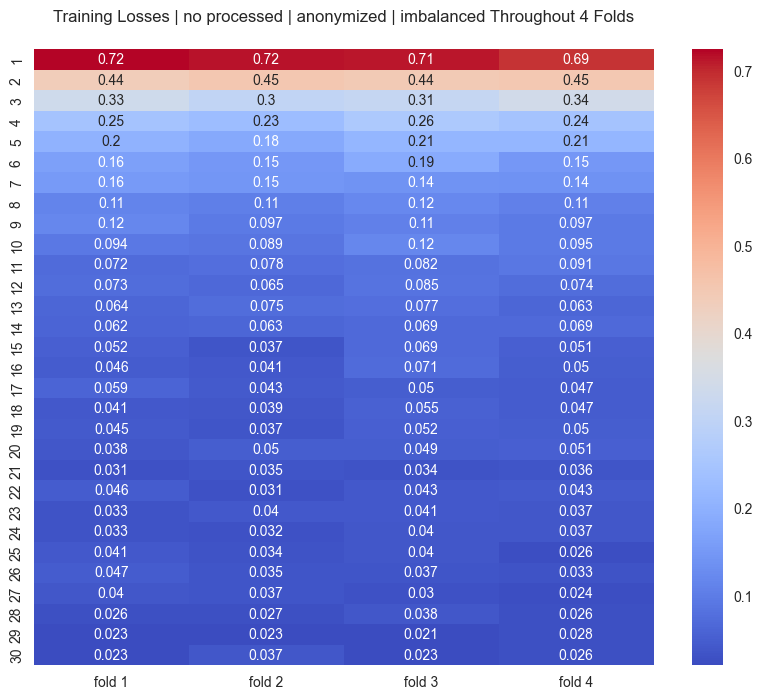

In [47]:
plotter.plot_heatmap(all_losses_3, "Training Losses | no processed | anonymized | imbalanced")

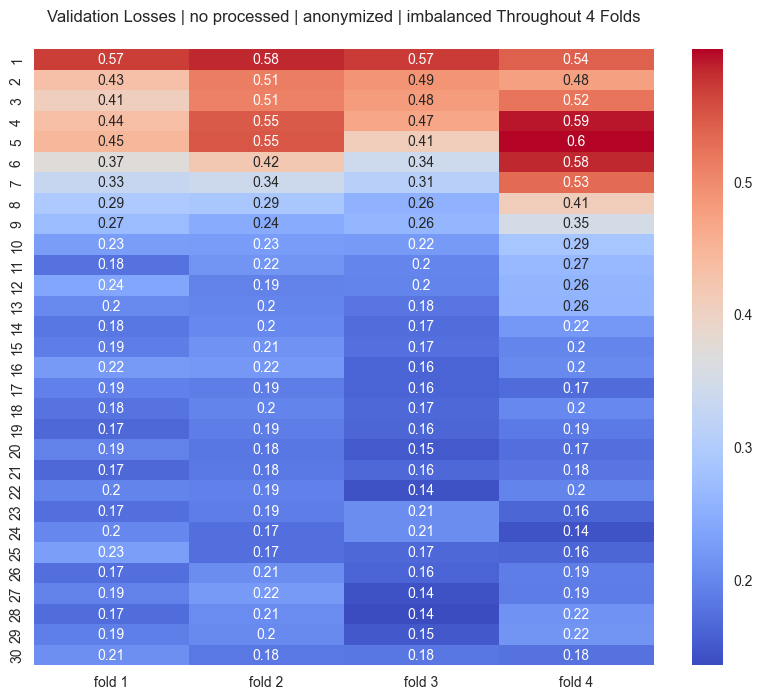

In [48]:
plotter.plot_heatmap(all_val_losses_3, "Validation Losses | no processed | anonymized | imbalanced")

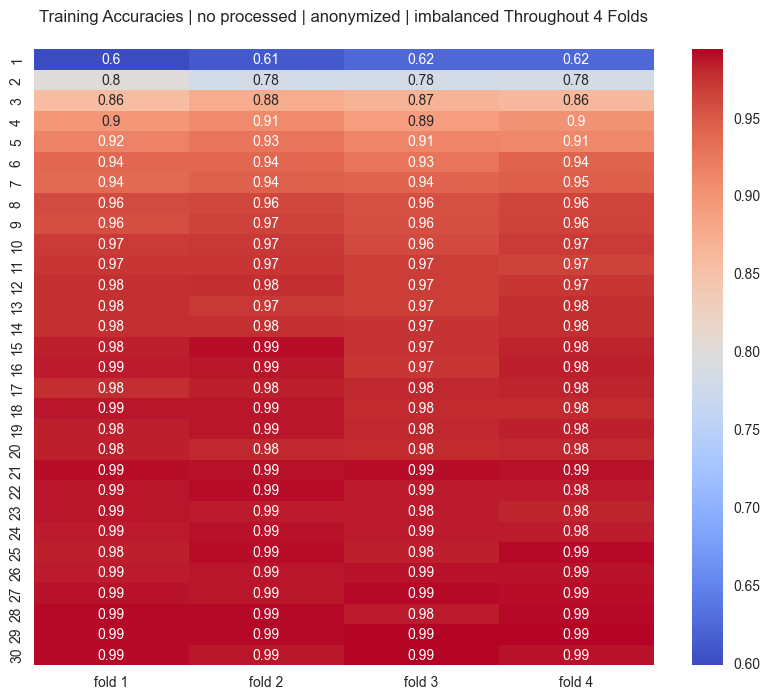

In [49]:
plotter.plot_heatmap(all_accuracies_3, "Training Accuracies | no processed | anonymized | imbalanced")

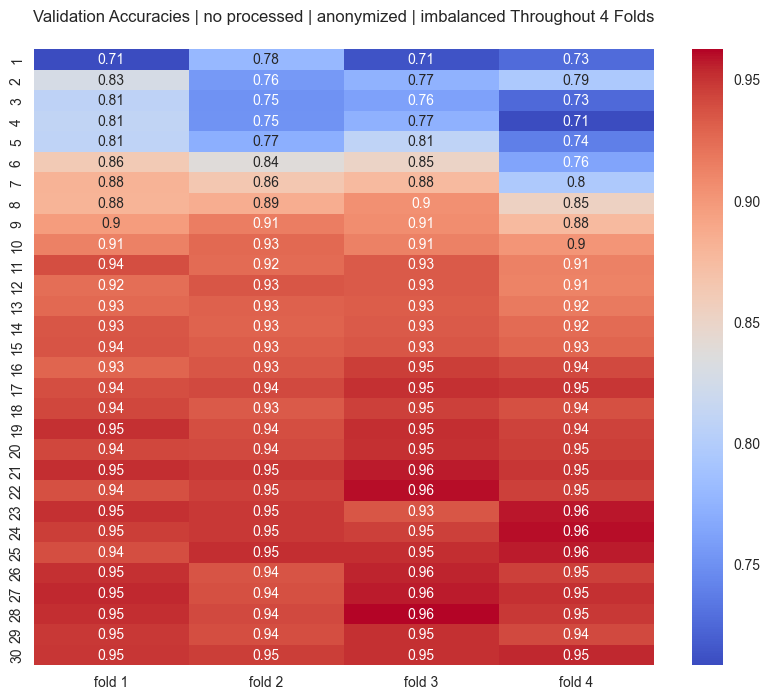

In [50]:
plotter.plot_heatmap(all_val_accuracies_3, "Validation Accuracies | no processed | anonymized | imbalanced")

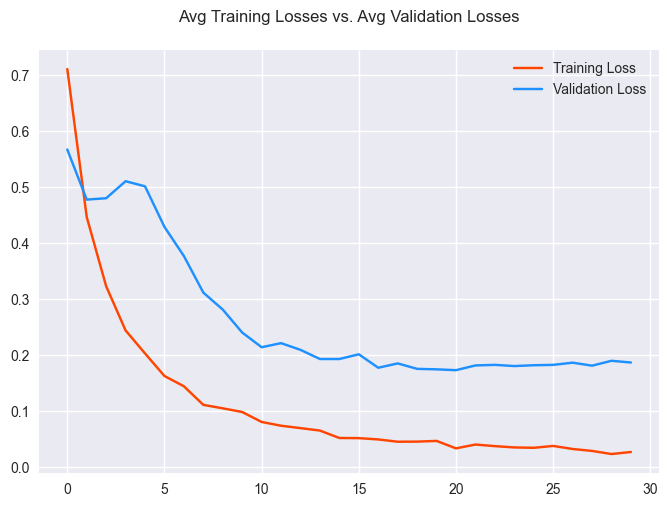

In [51]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_3, avg_val_loss_hist_3, "Training Loss", "Validation Loss")

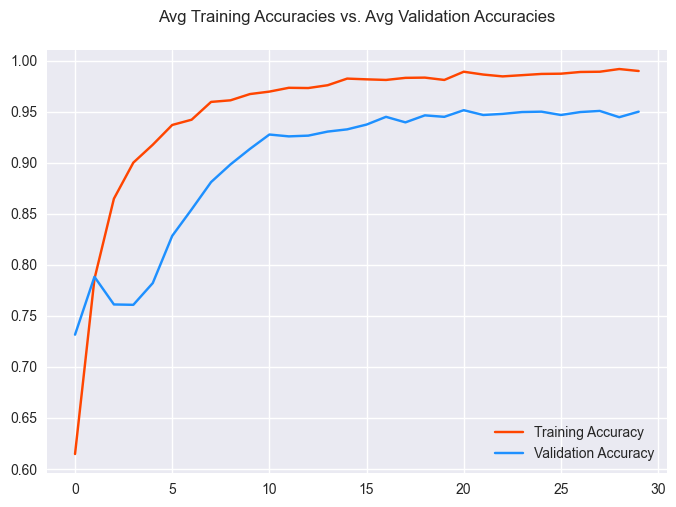

In [52]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_3, avg_val_acc_hist_3, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 0s 2ms/step


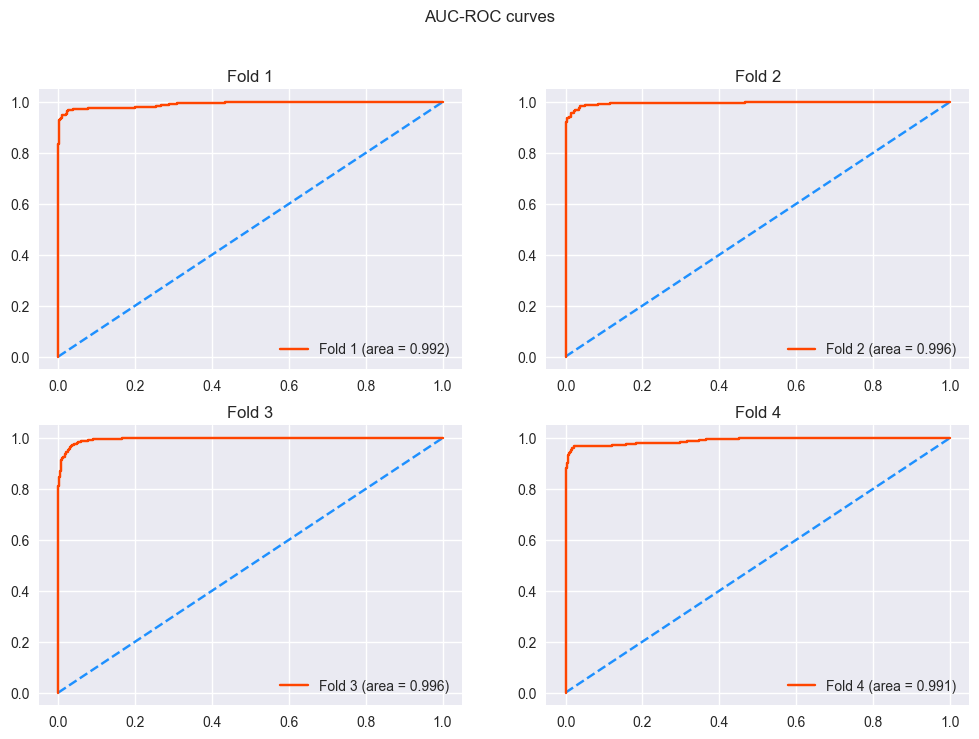

In [53]:
plotter.plot_roc_curve(all_models_3, X_test_vectors_3, y_test)

22/22 [==============================] - 0s 2ms/step


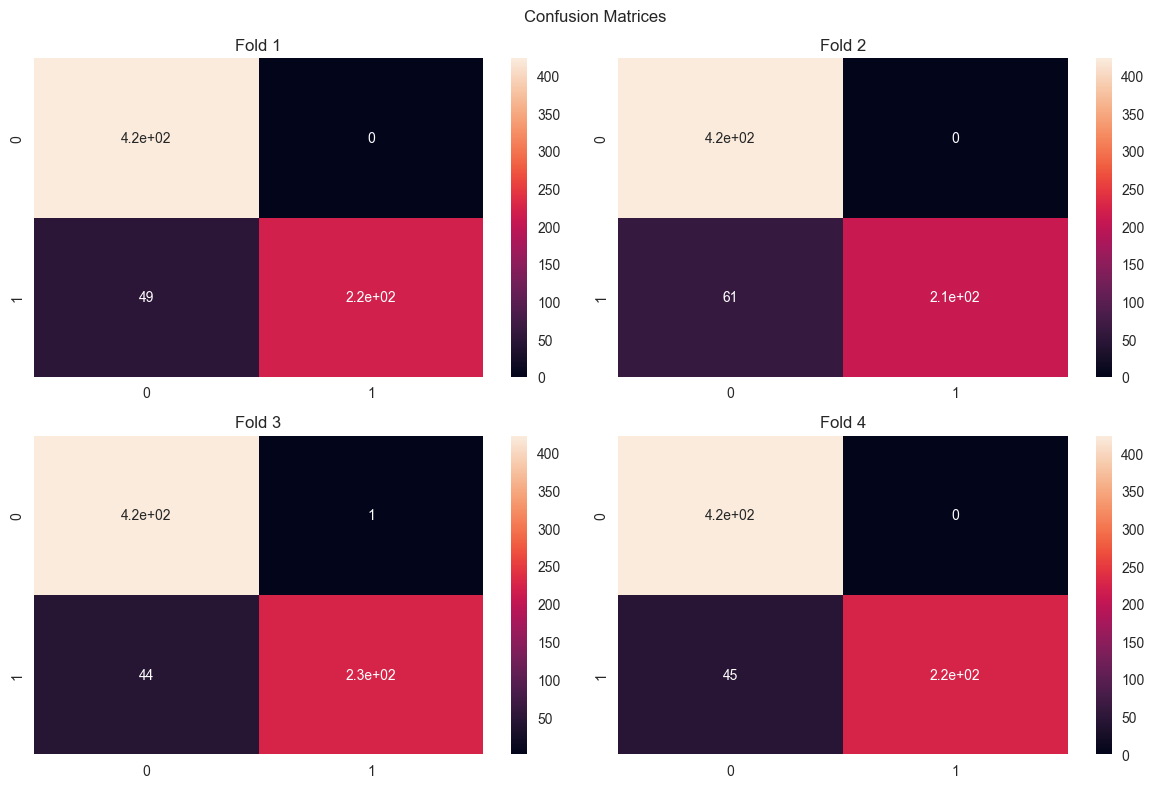

In [54]:
plotter.plot_confusion_matrix(all_models_3, X_test_vectors_3, y_test)

In [55]:
for i, trained_model in enumerate(all_models_3):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_3, y_test))

Model 1:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       423
           1       1.00      0.82      0.90       270

    accuracy                           0.93       693
   macro avg       0.95      0.91      0.92       693
weighted avg       0.94      0.93      0.93       693

Model 2:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       423
           1       1.00      0.77      0.87       270

    accuracy                           0.91       693
   macro avg       0.94      0.89      0.90       693
weighted avg       0.92      0.91      0.91       693

Model 3:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       423
           1       1.00      0.84      0.91       2

In [56]:
print_testing_loss_accuracy(all_models_3, X_test_vectors_3, y_test)

model: 1
22/22 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.9293
model: 2
22/22 [==============================] - 0s 3ms/step - loss: 0.4118 - accuracy: 0.9120
model: 3
22/22 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.9351
model: 4
22/22 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.9351
average testing loss: 0.383
average testing accuracy: 0.928


### Combination 4: (No Processing - Anonymization - Balancing)

In [57]:
first_party_names_4 = X_train["first_party"]
second_party_names_4 = X_train["second_party"]
facts_4 = X_train["Facts"]

In [58]:
test_first_party_names_4 = X_test["first_party"]
test_second_party_names_4 = X_test["second_party"]
test_facts_4 = X_test["Facts"]

In [59]:
anonymized_facts_4 = preprocessor.anonymize_data(first_party_names_4, second_party_names_4, facts_4)
test_anonymized_facts_4 = preprocessor.anonymize_data(test_first_party_names_4, test_second_party_names_4, test_facts_4)

In [60]:
balanced_anonymized_df = preprocessor.balance_data(anonymized_facts_4, y_train)
balanced_anonymized_df = balanced_anonymized_df.rename(columns={0: "Facts"})
balanced_anonymized_df.head()

Facts  winner_index
2517  Four former executives of Hollinger Internatio...             0
2462  In 1998, Congress enacted the Federal Vacancie...             1
754   In April _PARTY_ 1952, during the Korean War, ...             0
178   Petitioner _PARTY_ was convicted for federal d...             1
910   Two Austr _PARTY_ ians and 12 Kuwaitis were ca...             0

In [61]:
X_train_balanced_anonymized = balanced_anonymized_df["Facts"]
y_train_balanced_anonymized = balanced_anonymized_df["winner_index"]

In [62]:
embeddings_doc2vec_4, X_train_vectors_4 = preprocessor.convert_text_to_vectors_doc2vec(X_train_balanced_anonymized)

In [63]:
X_test_vectors_4 = preprocessor.convert_text_to_vectors_doc2vec(test_anonymized_facts_4, train=False, embeddings_doc2vec=embeddings_doc2vec_4)

In [64]:
all_models_4, all_losses_4, all_val_losses_4, all_accuracies_4, all_val_accuracies_4 = train_model(build_doc2vec_model, X_train_vectors_4, y_train_balanced_anonymized)

fold: 1
Epoch 1/30
40/40 [==============================] - 3s 14ms/step - loss: 0.5466 - accuracy: 0.7127 - val_loss: 0.4433 - val_accuracy: 0.8698
Epoch 2/30
40/40 [==============================] - 0s 8ms/step - loss: 0.2440 - accuracy: 0.8963 - val_loss: 0.3809 - val_accuracy: 0.7905
Epoch 3/30
40/40 [==============================] - 0s 9ms/step - loss: 0.1566 - accuracy: 0.9464 - val_loss: 0.3449 - val_accuracy: 0.8367
Epoch 4/30
40/40 [==============================] - 0s 8ms/step - loss: 0.1189 - accuracy: 0.9547 - val_loss: 0.2961 - val_accuracy: 0.8722
Epoch 5/30
40/40 [==============================] - 0s 8ms/step - loss: 0.0906 - accuracy: 0.9657 - val_loss: 0.2300 - val_accuracy: 0.9101
Epoch 6/30
40/40 [==============================] - 0s 8ms/step - loss: 0.0666 - accuracy: 0.9787 - val_loss: 0.1866 - val_accuracy: 0.9349
Epoch 7/30
40/40 [==============================] - 0s 8ms/step - loss: 0.0606 - accuracy: 0.9791 - val_loss: 0.1931 - val_accuracy: 0.9325
Epoch 8/30


In [65]:
avg_loss_hist_4, avg_val_loss_hist_4, avg_acc_hist_4, avg_val_acc_hist_4 = calculate_average_measures(all_losses_4, all_val_losses_4, all_accuracies_4, all_val_accuracies_4)

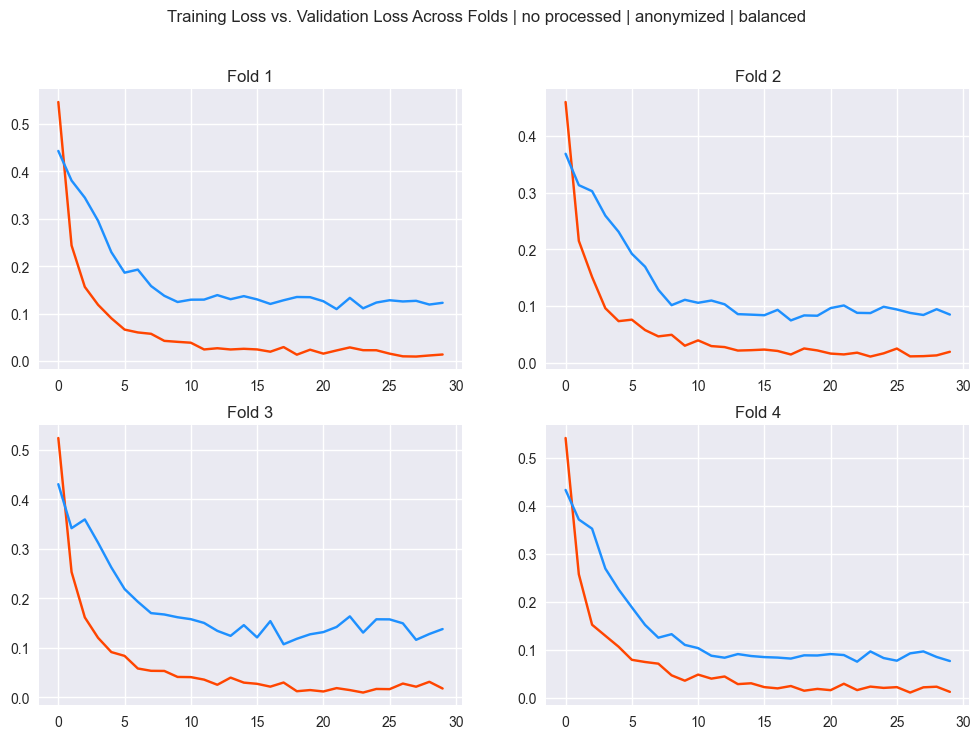

In [66]:
plotter.plot_subplots_curve(all_losses_4, all_val_losses_4, "Training Loss vs. Validation Loss Across Folds | no processed | anonymized | balanced ")

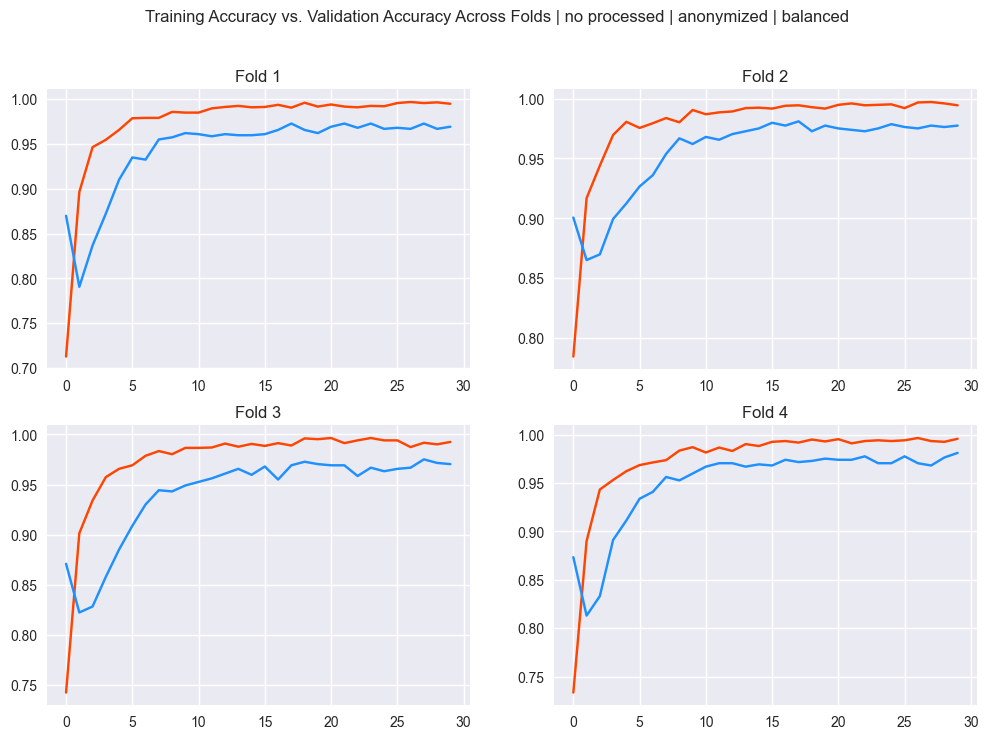

In [67]:
plotter.plot_subplots_curve(all_accuracies_4, all_val_accuracies_4, "Training Accuracy vs. Validation Accuracy Across Folds | no processed | anonymized | balanced")

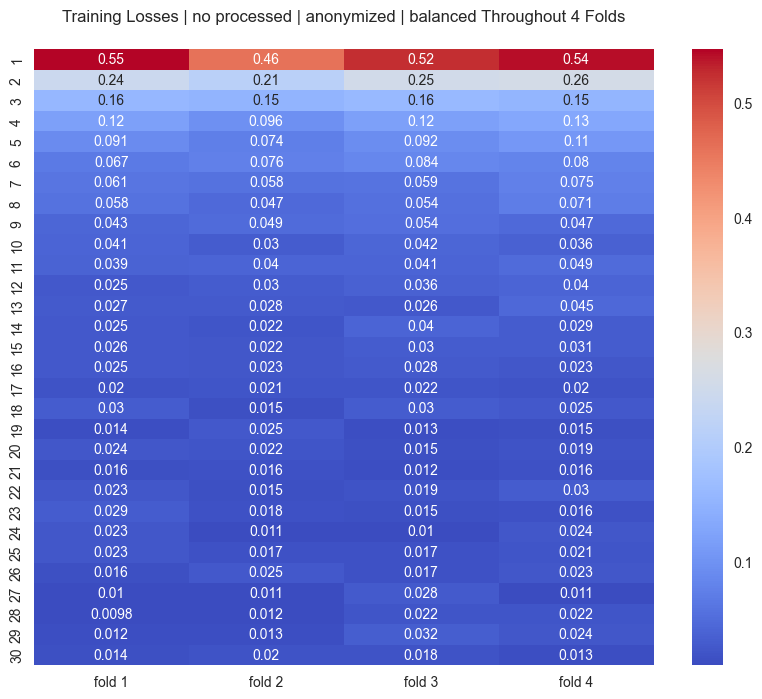

In [68]:
plotter.plot_heatmap(all_losses_4, "Training Losses | no processed | anonymized | balanced")

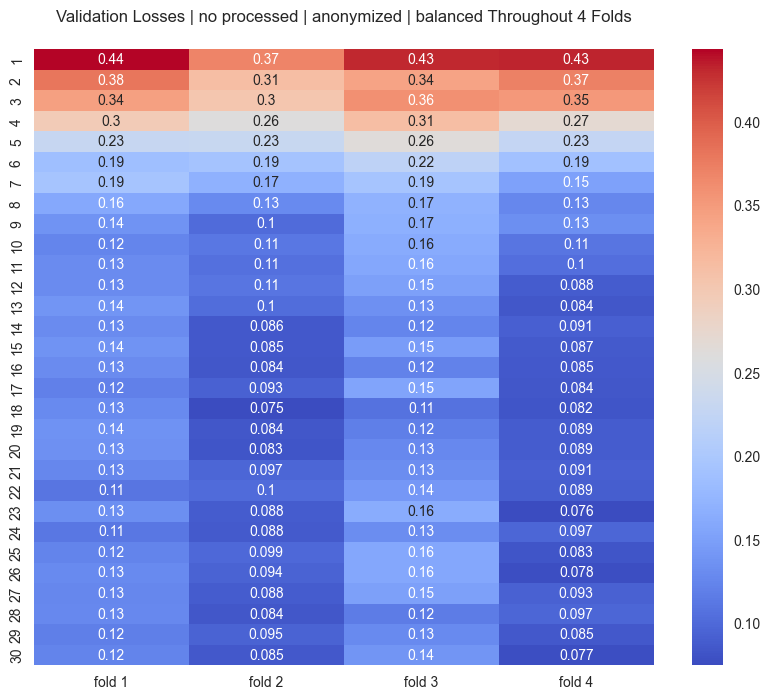

In [69]:
plotter.plot_heatmap(all_val_losses_4, "Validation Losses | no processed | anonymized | balanced")

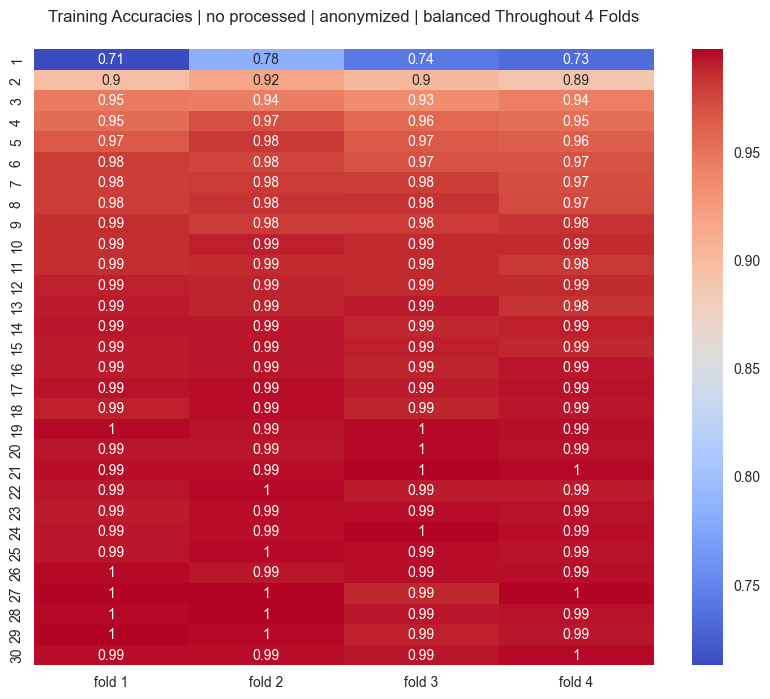

In [70]:
plotter.plot_heatmap(all_accuracies_4, "Training Accuracies | no processed | anonymized | balanced")

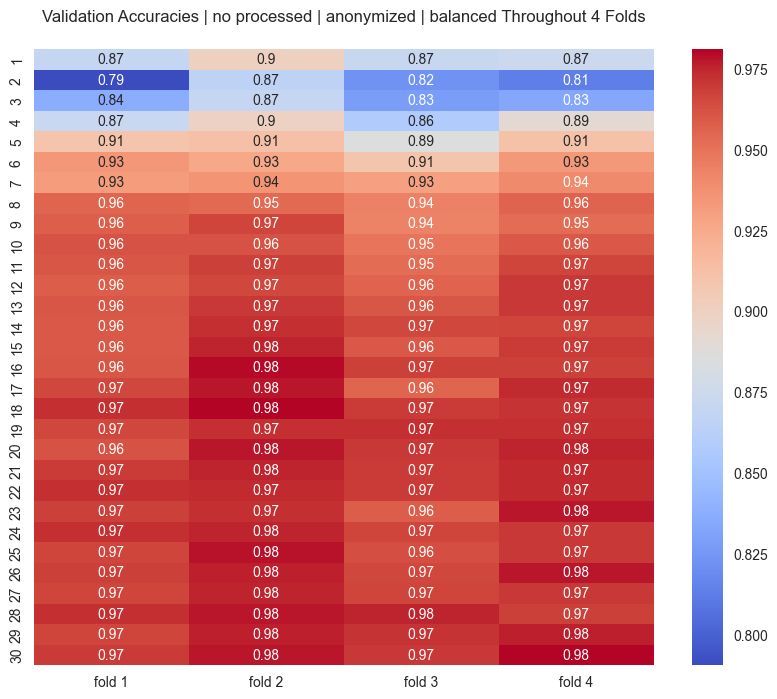

In [71]:
plotter.plot_heatmap(all_val_accuracies_4, "Validation Accuracies | no processed | anonymized | balanced")

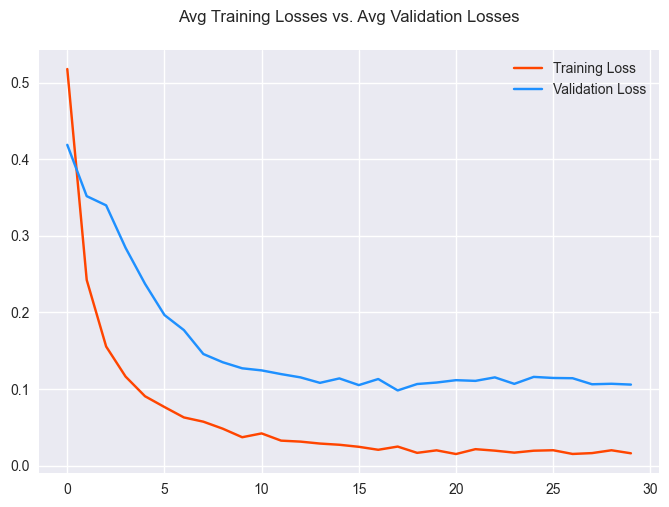

In [72]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_4, avg_val_loss_hist_4, "Training Loss", "Validation Loss")

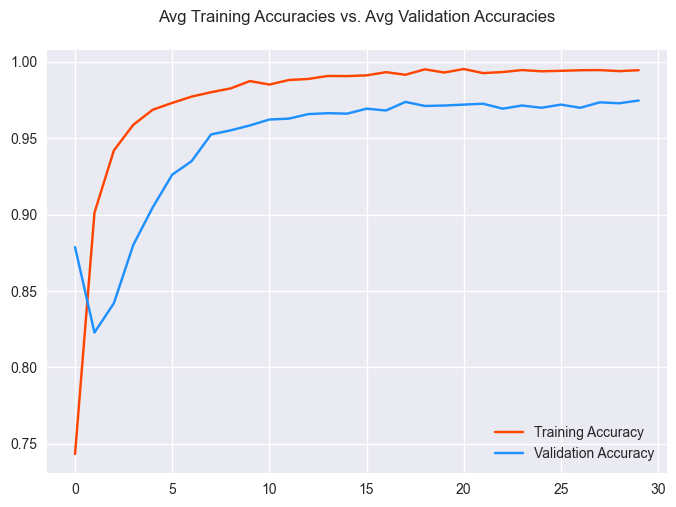

In [73]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_4, avg_val_acc_hist_4, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 0s 2ms/step


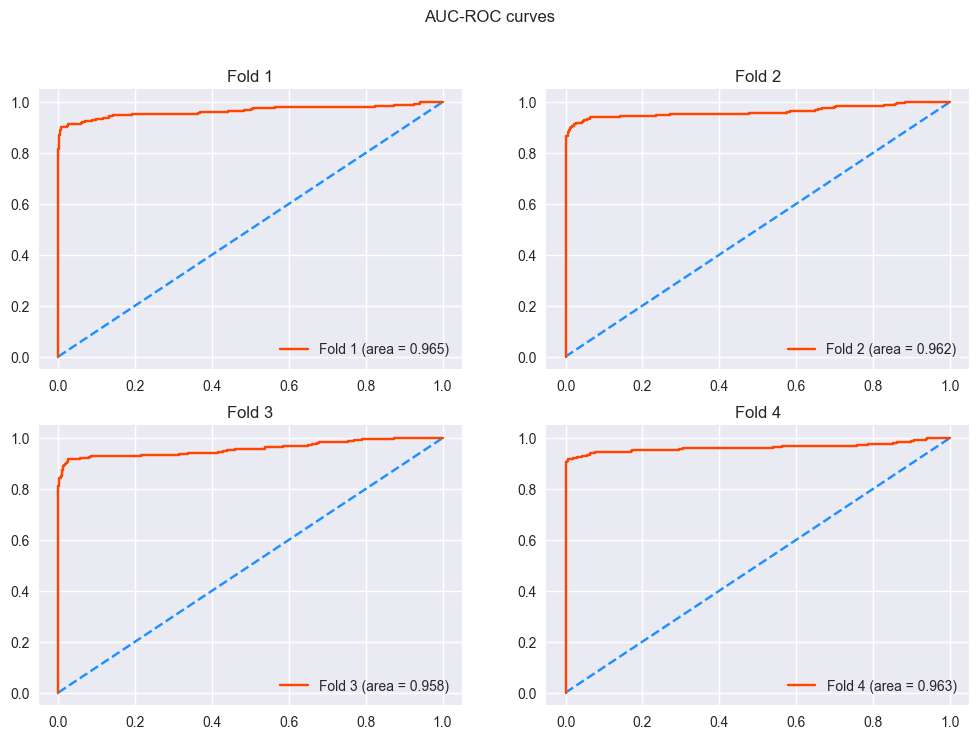

In [74]:
plotter.plot_roc_curve(all_models_4, X_test_vectors_4, y_test)

22/22 [==============================] - 0s 2ms/step


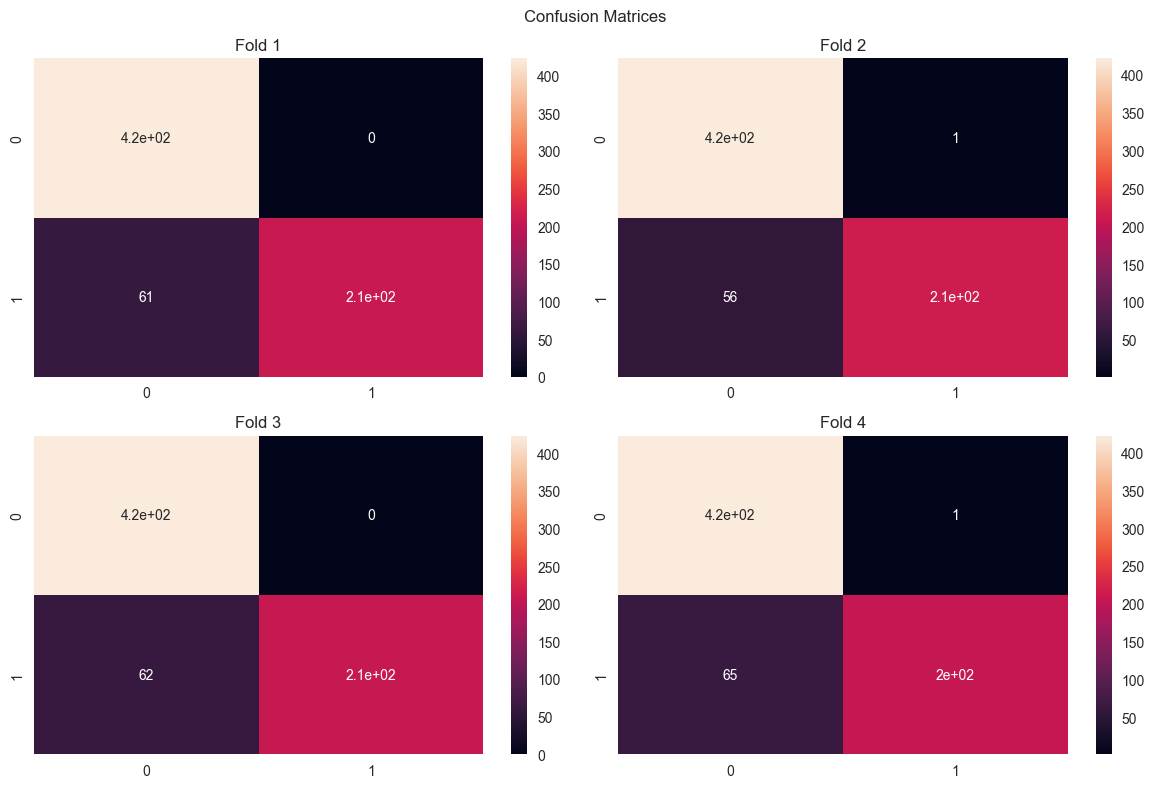

In [75]:
plotter.plot_confusion_matrix(all_models_4, X_test_vectors_4, y_test)

In [76]:
for i, trained_model in enumerate(all_models_4):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_4, y_test))

Model 1:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       423
           1       1.00      0.77      0.87       270

    accuracy                           0.91       693
   macro avg       0.94      0.89      0.90       693
weighted avg       0.92      0.91      0.91       693

Model 2:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       423
           1       1.00      0.79      0.88       270

    accuracy                           0.92       693
   macro avg       0.94      0.90      0.91       693
weighted avg       0.93      0.92      0.92       693

Model 3:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       423
           1       1.00      0.77      0.87       2

In [77]:
print_testing_loss_accuracy(all_models_4, X_test_vectors_4, y_test)

model: 1
22/22 [==============================] - 0s 2ms/step - loss: 0.8071 - accuracy: 0.9120
model: 2
22/22 [==============================] - 0s 3ms/step - loss: 0.7704 - accuracy: 0.9177
model: 3
22/22 [==============================] - 0s 2ms/step - loss: 0.8807 - accuracy: 0.9105
model: 4
22/22 [==============================] - 0s 2ms/step - loss: 0.8194 - accuracy: 0.9048
average testing loss: 0.819
average testing accuracy: 0.911


### Combination 5: (Processing - No anonymization - Imbalancing)

In [78]:
X_train_processed = preprocessor.preprocess_data(X_train["Facts"])
X_test_processed = preprocessor.preprocess_data(X_test["Facts"])

In [79]:
embeddings_doc2vec_5, X_train_vectors_5 = preprocessor.convert_text_to_vectors_doc2vec(X_train_processed)

In [80]:
X_test_vectors_5 = preprocessor.convert_text_to_vectors_doc2vec(X_test_processed, train=False, embeddings_doc2vec=embeddings_doc2vec_5)

In [81]:
all_models_5, all_losses_5, all_val_losses_5, all_accuracies_5, all_val_accuracies_5 = train_model(build_doc2vec_model, X_train_vectors_5, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 3s 15ms/step - loss: 0.6782 - accuracy: 0.6402 - val_loss: 0.5785 - val_accuracy: 0.6445
Epoch 2/30
33/33 [==============================] - 0s 9ms/step - loss: 0.4320 - accuracy: 0.8047 - val_loss: 0.4277 - val_accuracy: 0.8324
Epoch 3/30
33/33 [==============================] - 0s 9ms/step - loss: 0.2949 - accuracy: 0.8721 - val_loss: 0.3695 - val_accuracy: 0.8468
Epoch 4/30
33/33 [==============================] - 0s 8ms/step - loss: 0.2354 - accuracy: 0.9052 - val_loss: 0.3642 - val_accuracy: 0.8410
Epoch 5/30
33/33 [==============================] - 0s 8ms/step - loss: 0.1758 - accuracy: 0.9351 - val_loss: 0.4056 - val_accuracy: 0.8396
Epoch 6/30
33/33 [==============================] - 0s 8ms/step - loss: 0.1527 - accuracy: 0.9423 - val_loss: 0.4046 - val_accuracy: 0.8555
Epoch 7/30
33/33 [==============================] - 0s 8ms/step - loss: 0.1090 - accuracy: 0.9596 - val_loss: 0.3658 - val_accuracy: 0.8829
Epoch 8/30


In [82]:
avg_loss_hist_5, avg_val_loss_hist_5, avg_acc_hist_5, avg_val_acc_hist_5 = calculate_average_measures(all_losses_5, all_val_losses_5, all_accuracies_5, all_val_accuracies_5)

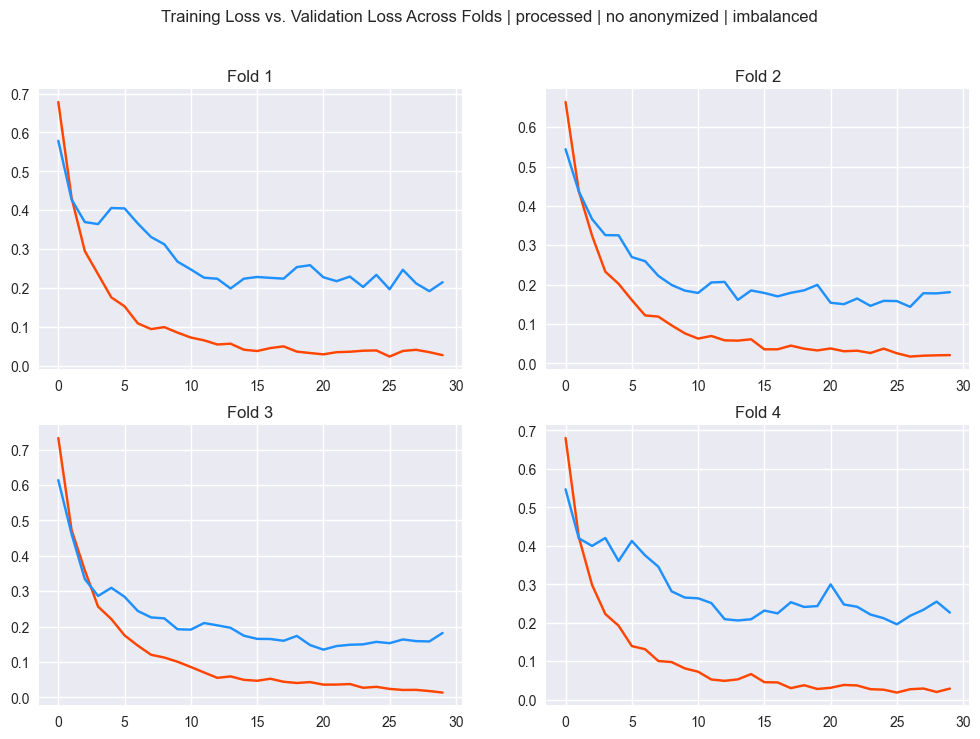

In [83]:
plotter.plot_subplots_curve(all_losses_5, all_val_losses_5, "Training Loss vs. Validation Loss Across Folds | processed | no anonymized | imbalanced")

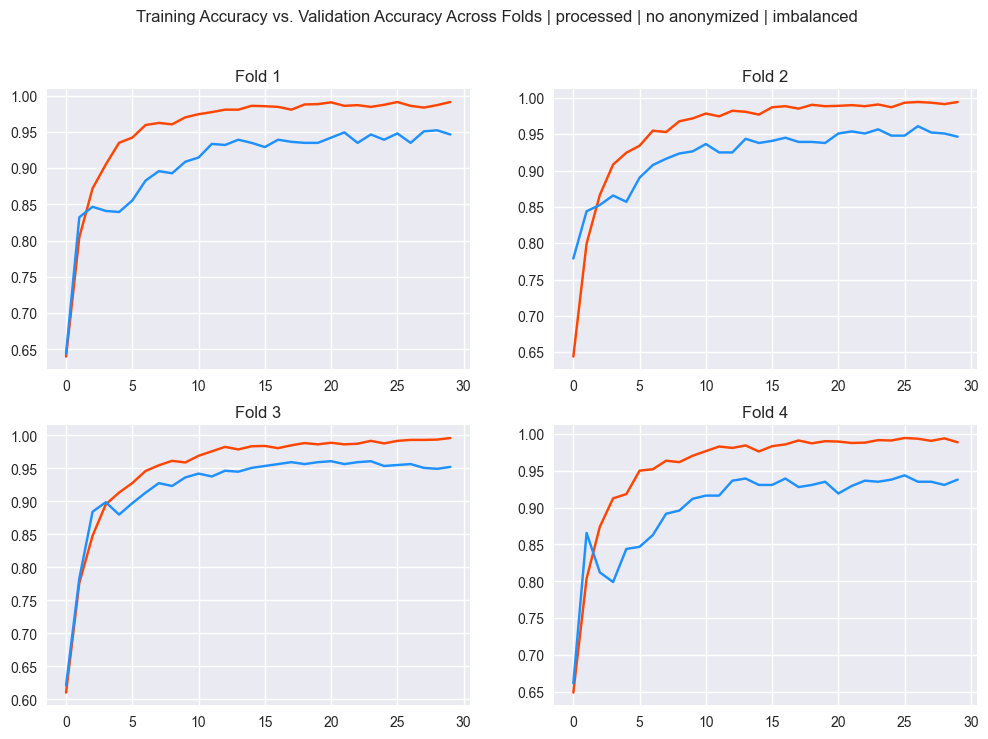

In [84]:
plotter.plot_subplots_curve(all_accuracies_5, all_val_accuracies_5, "Training Accuracy vs. Validation Accuracy Across Folds | processed | no anonymized | imbalanced")

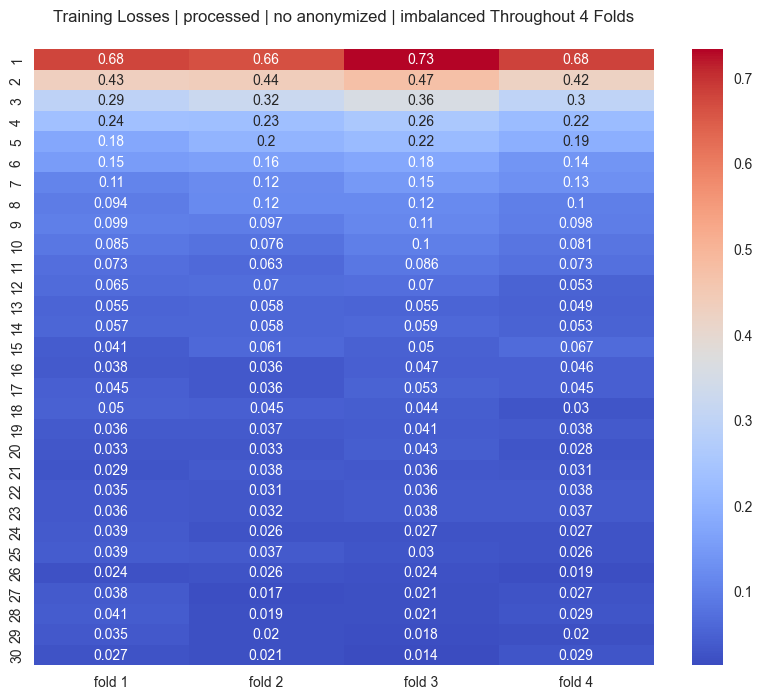

In [85]:
plotter.plot_heatmap(all_losses_5, "Training Losses | processed | no anonymized | imbalanced")

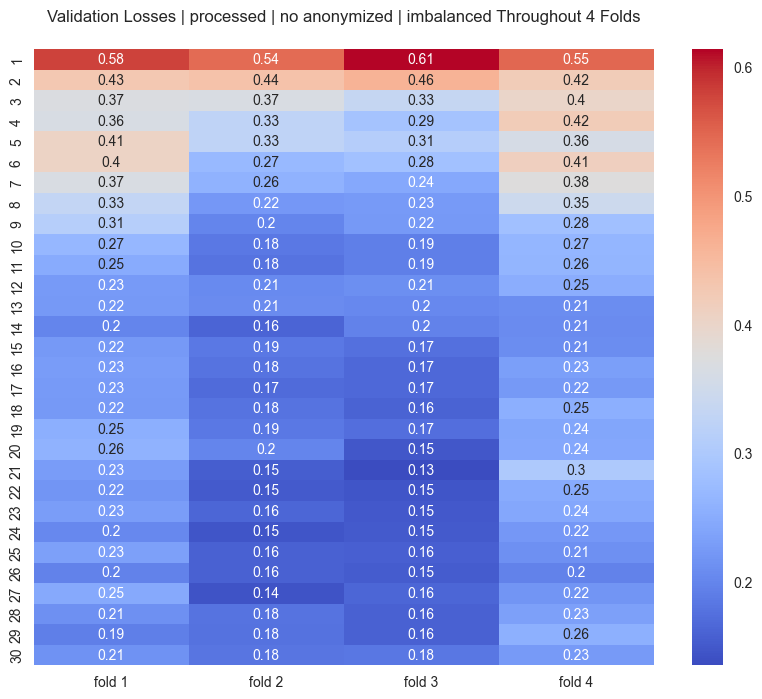

In [86]:
plotter.plot_heatmap(all_val_losses_5, "Validation Losses | processed | no anonymized | imbalanced")

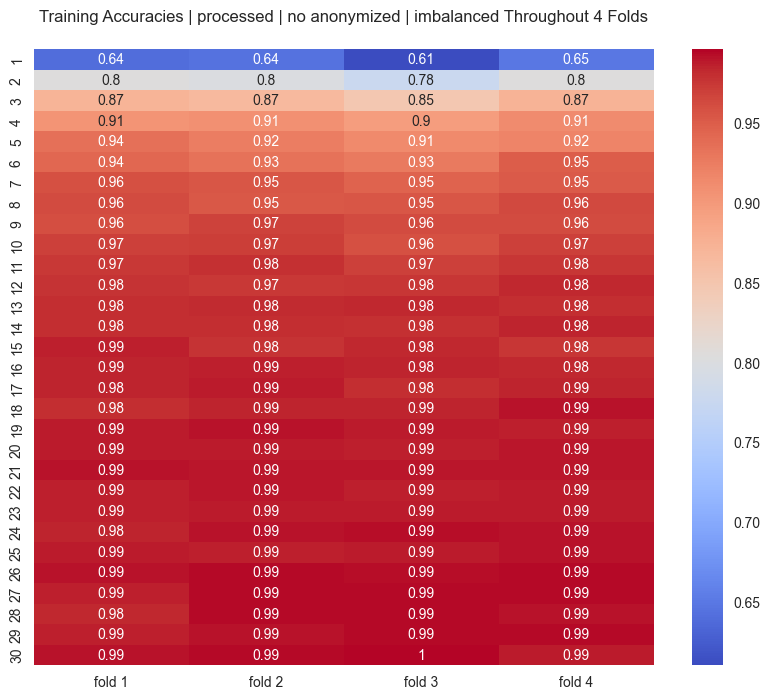

In [87]:
plotter.plot_heatmap(all_accuracies_5, "Training Accuracies | processed | no anonymized | imbalanced")

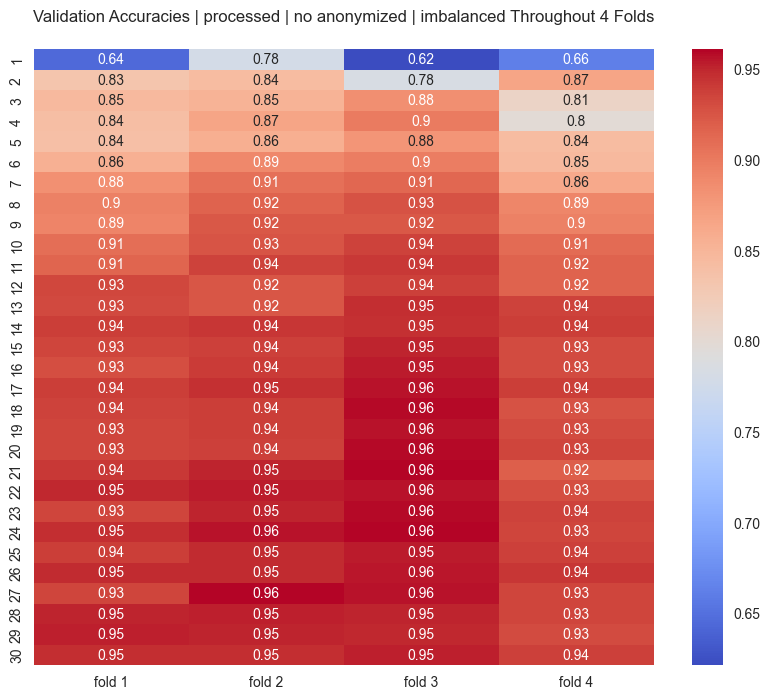

In [88]:
plotter.plot_heatmap(all_val_accuracies_5, "Validation Accuracies | processed | no anonymized | imbalanced")

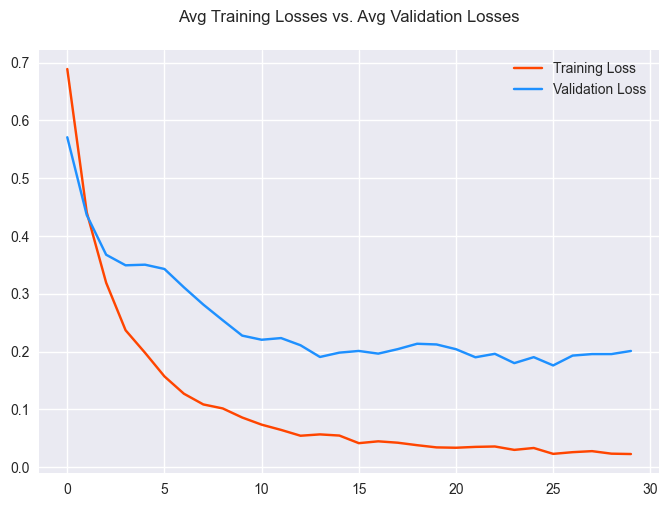

In [89]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_5, avg_val_loss_hist_5, "Training Loss", "Validation Loss")

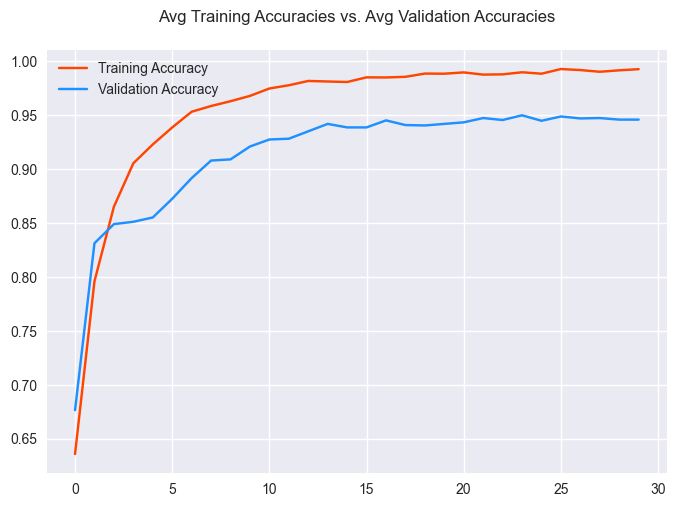

In [90]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_5, avg_val_acc_hist_5, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 0s 2ms/step


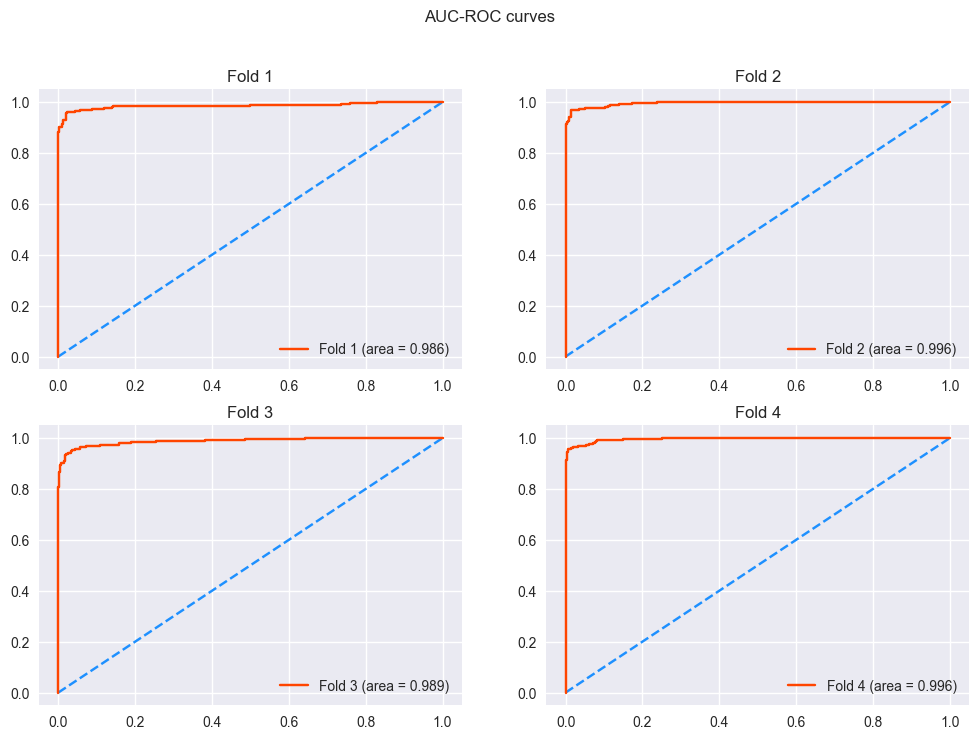

In [91]:
plotter.plot_roc_curve(all_models_5, X_test_vectors_5, y_test)

22/22 [==============================] - 0s 2ms/step


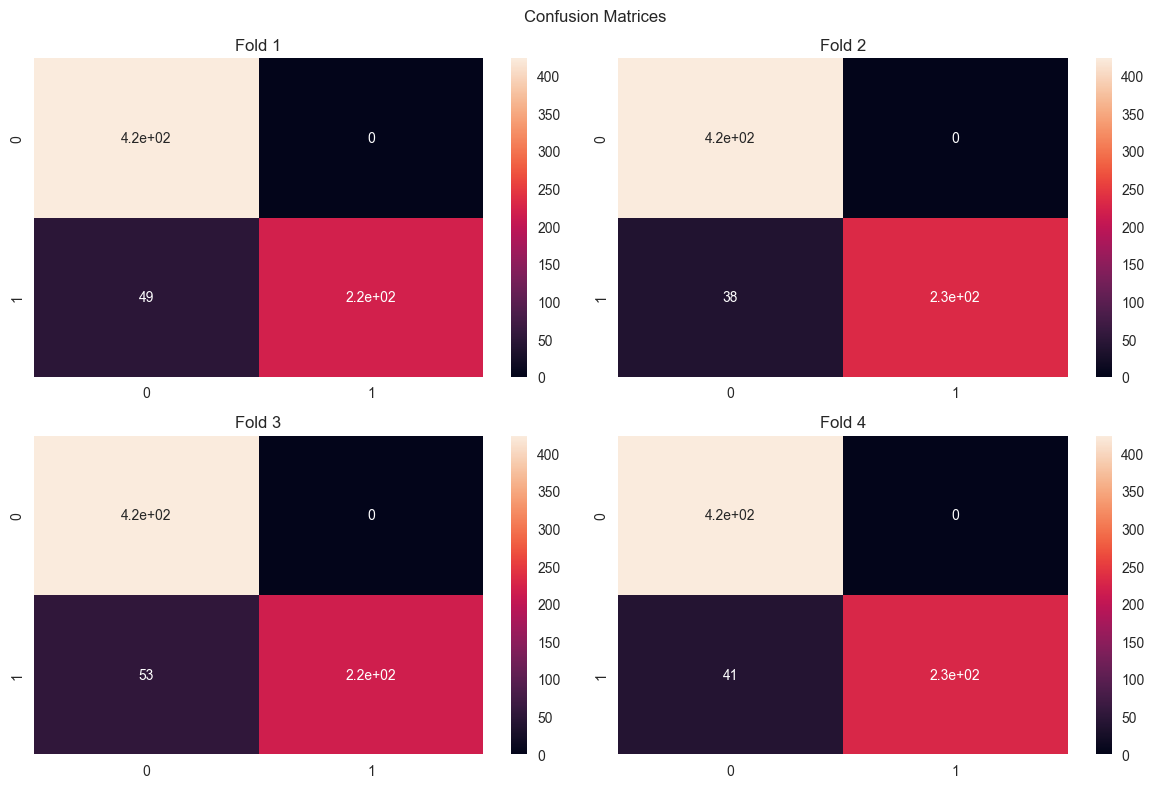

In [92]:
plotter.plot_confusion_matrix(all_models_5, X_test_vectors_5, y_test)

In [93]:
for i, trained_model in enumerate(all_models_5):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_5, y_test))

Model 1:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       423
           1       1.00      0.82      0.90       270

    accuracy                           0.93       693
   macro avg       0.95      0.91      0.92       693
weighted avg       0.94      0.93      0.93       693

Model 2:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       423
           1       1.00      0.86      0.92       270

    accuracy                           0.95       693
   macro avg       0.96      0.93      0.94       693
weighted avg       0.95      0.95      0.94       693

Model 3:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       423
           1       1.00      0.80      0.89       2

In [94]:
print_testing_loss_accuracy(all_models_5, X_test_vectors_5, y_test)

model: 1
22/22 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.9293
model: 2
22/22 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 0.9452
model: 3
22/22 [==============================] - 0s 2ms/step - loss: 0.4538 - accuracy: 0.9235
model: 4
22/22 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.9408
average testing loss: 0.358
average testing accuracy: 0.935


### Combination 6: (Processing - No anonymization - Balancing)

In [95]:
processed_balanced_df = preprocessor.balance_data(X_train_processed, y_train)
X_train_processed_balanced = processed_balanced_df["Facts"]
y_train_processed_balanced = processed_balanced_df["winner_index"]

In [96]:
embeddings_doc2vec_6, X_train_vectors_6 = preprocessor.convert_text_to_vectors_doc2vec(X_train_processed_balanced)

In [97]:
X_test_vectors_6 = preprocessor.convert_text_to_vectors_doc2vec(X_test_processed, train=False, embeddings_doc2vec=embeddings_doc2vec_6)

In [98]:
all_models_6, all_losses_6, all_val_losses_6, all_accuracies_6, all_val_accuracies_6 = train_model(build_doc2vec_model, X_train_vectors_6, y_train_processed_balanced)

fold: 1
Epoch 1/30
40/40 [==============================] - 3s 15ms/step - loss: 0.4997 - accuracy: 0.7623 - val_loss: 0.4494 - val_accuracy: 0.8284
Epoch 2/30
40/40 [==============================] - 0s 8ms/step - loss: 0.2351 - accuracy: 0.9054 - val_loss: 0.2747 - val_accuracy: 0.8994
Epoch 3/30
40/40 [==============================] - 0s 8ms/step - loss: 0.1602 - accuracy: 0.9342 - val_loss: 0.2734 - val_accuracy: 0.8828
Epoch 4/30
40/40 [==============================] - 0s 8ms/step - loss: 0.1158 - accuracy: 0.9539 - val_loss: 0.2428 - val_accuracy: 0.8994
Epoch 5/30
40/40 [==============================] - 0s 8ms/step - loss: 0.0860 - accuracy: 0.9712 - val_loss: 0.2179 - val_accuracy: 0.9089
Epoch 6/30
40/40 [==============================] - 0s 9ms/step - loss: 0.0815 - accuracy: 0.9720 - val_loss: 0.1712 - val_accuracy: 0.9361
Epoch 7/30
40/40 [==============================] - 0s 8ms/step - loss: 0.0566 - accuracy: 0.9807 - val_loss: 0.1728 - val_accuracy: 0.9373
Epoch 8/30


In [99]:
avg_loss_hist_6, avg_val_loss_hist_6, avg_acc_hist_6, avg_val_acc_hist_6 = calculate_average_measures(all_losses_6, all_val_losses_6, all_accuracies_6, all_val_accuracies_6)

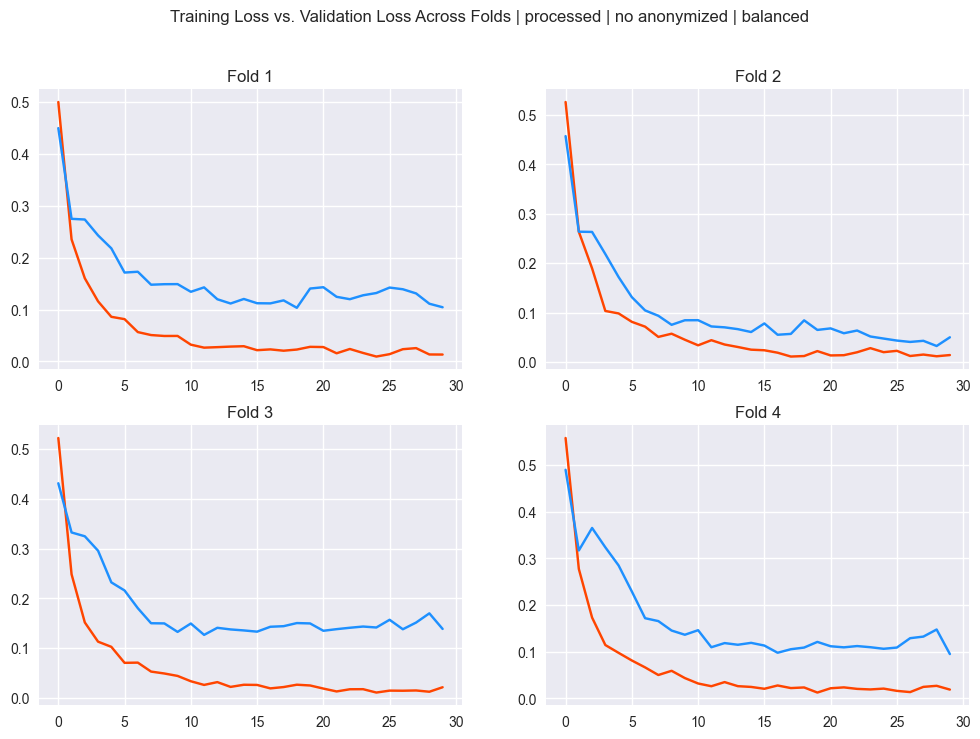

In [100]:
plotter.plot_subplots_curve(all_losses_6, all_val_losses_6, "Training Loss vs. Validation Loss Across Folds | processed | no anonymized | balanced")

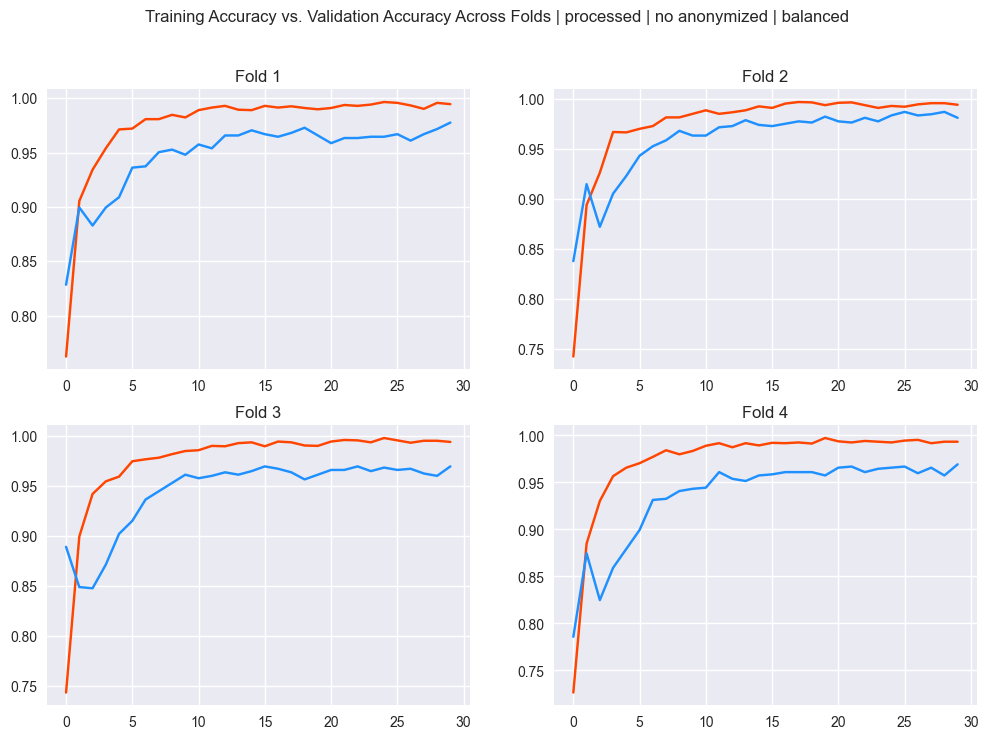

In [101]:
plotter.plot_subplots_curve(all_accuracies_6, all_val_accuracies_6, "Training Accuracy vs. Validation Accuracy Across Folds | processed | no anonymized | balanced")

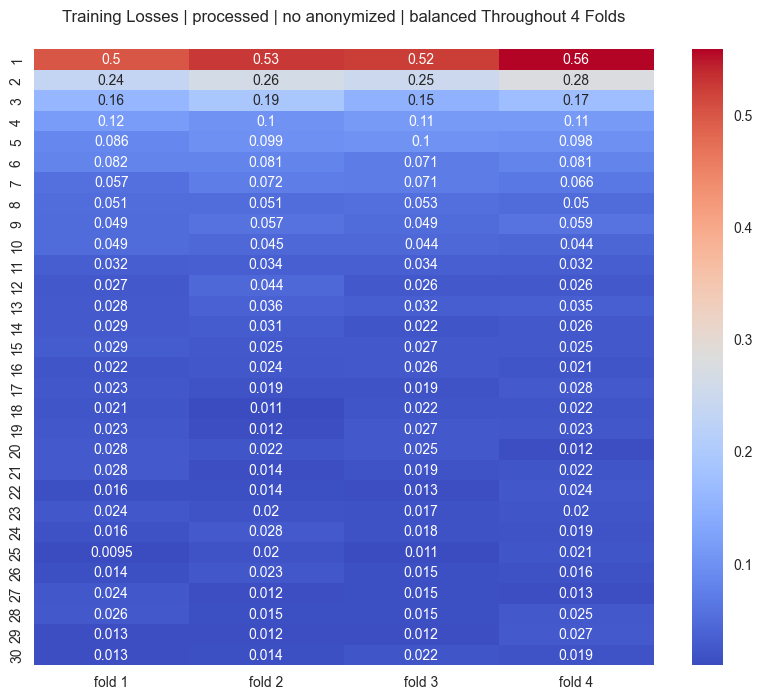

In [102]:
plotter.plot_heatmap(all_losses_6, "Training Losses | processed | no anonymized | balanced")

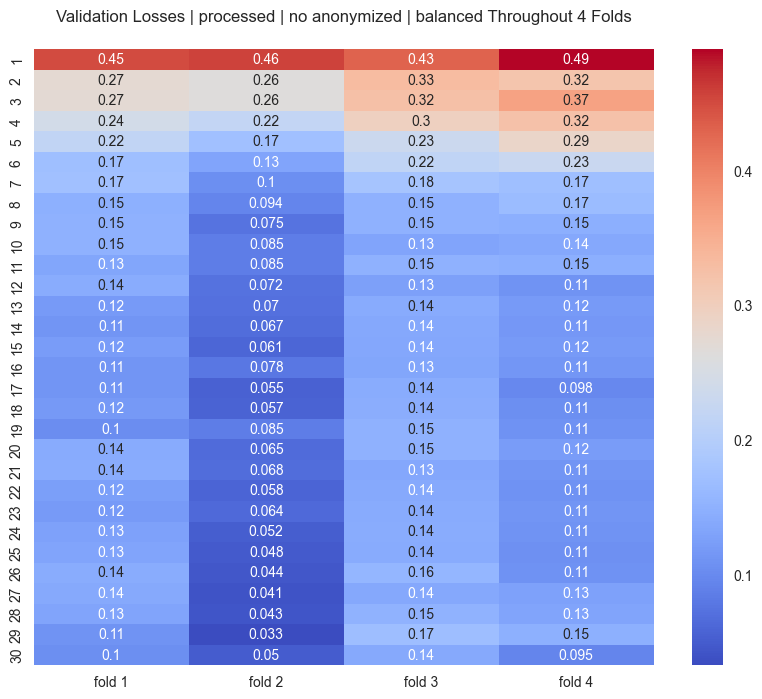

In [103]:
plotter.plot_heatmap(all_val_losses_6, "Validation Losses | processed | no anonymized | balanced")

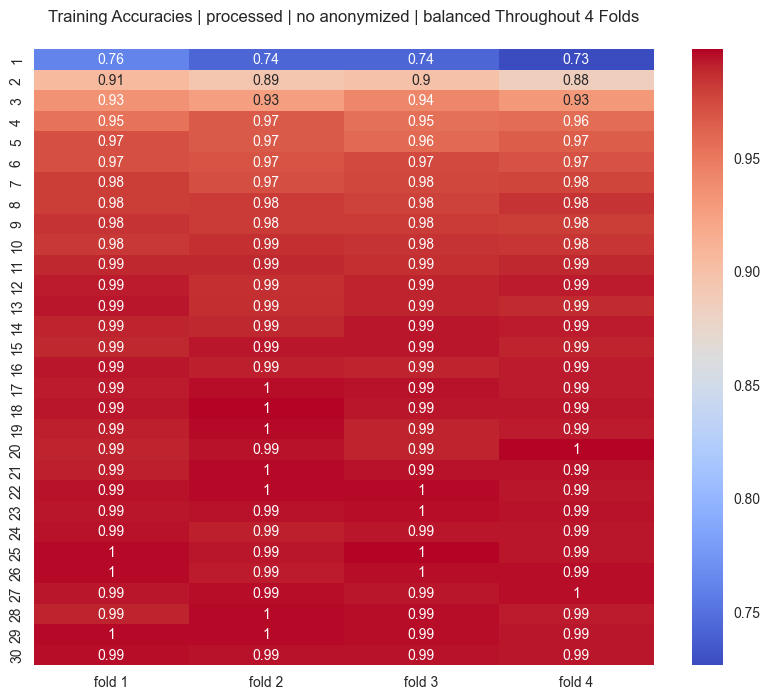

In [104]:
plotter.plot_heatmap(all_accuracies_6, "Training Accuracies | processed | no anonymized | balanced")

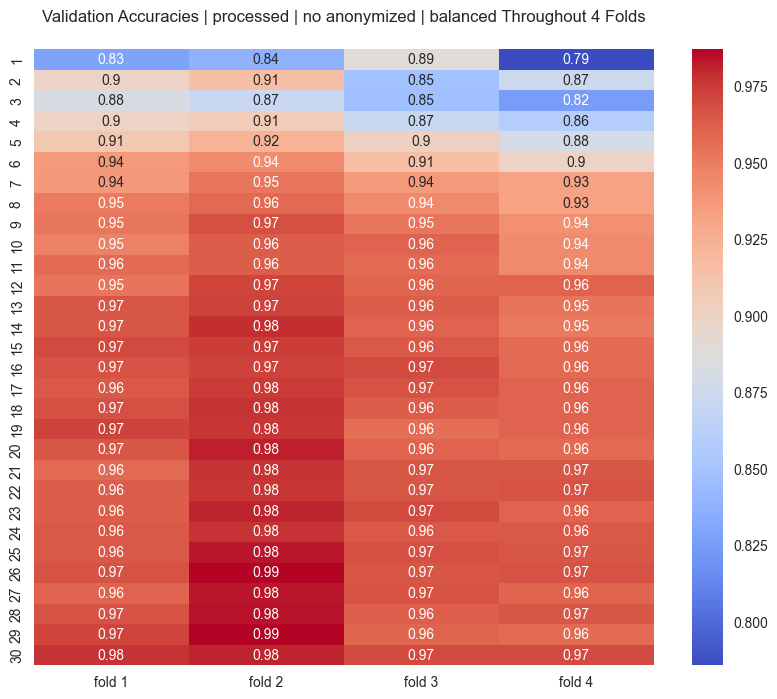

In [105]:
plotter.plot_heatmap(all_val_accuracies_6, "Validation Accuracies | processed | no anonymized | balanced")

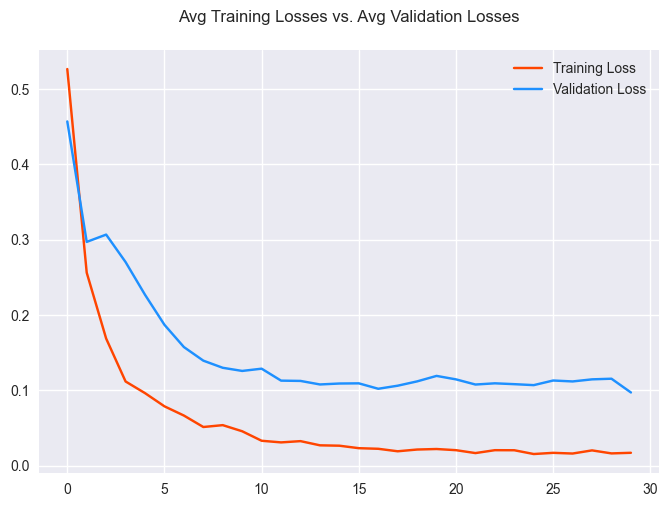

In [106]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_6, avg_val_loss_hist_6, "Training Loss", "Validation Loss")

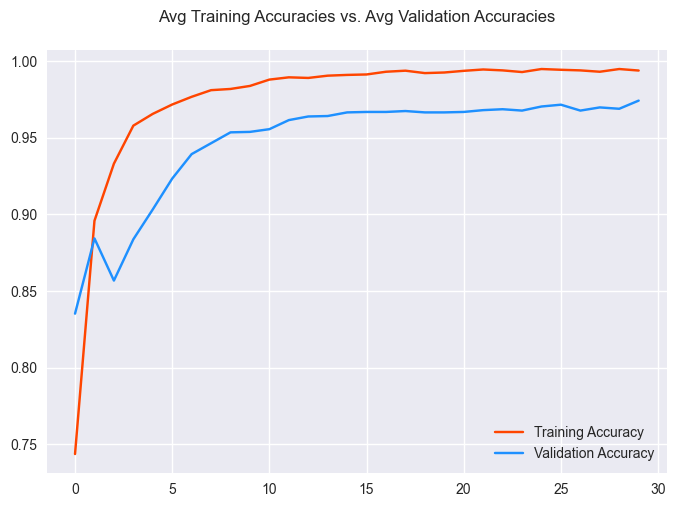

In [107]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_6, avg_val_acc_hist_6, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 0s 2ms/step


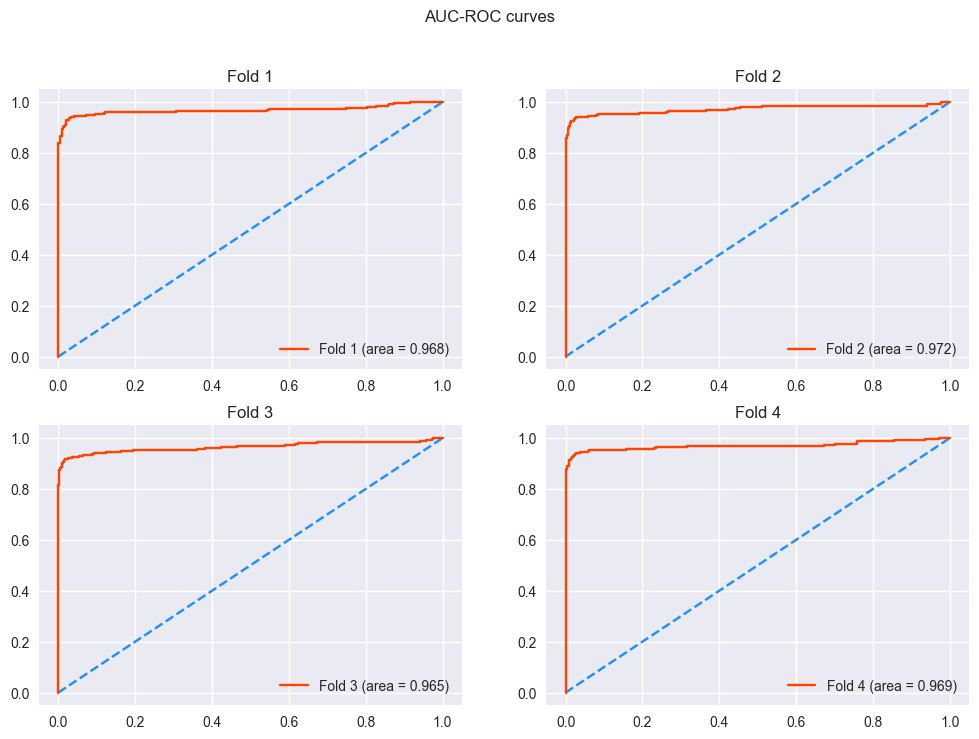

In [108]:
plotter.plot_roc_curve(all_models_6, X_test_vectors_6, y_test)

22/22 [==============================] - 0s 2ms/step


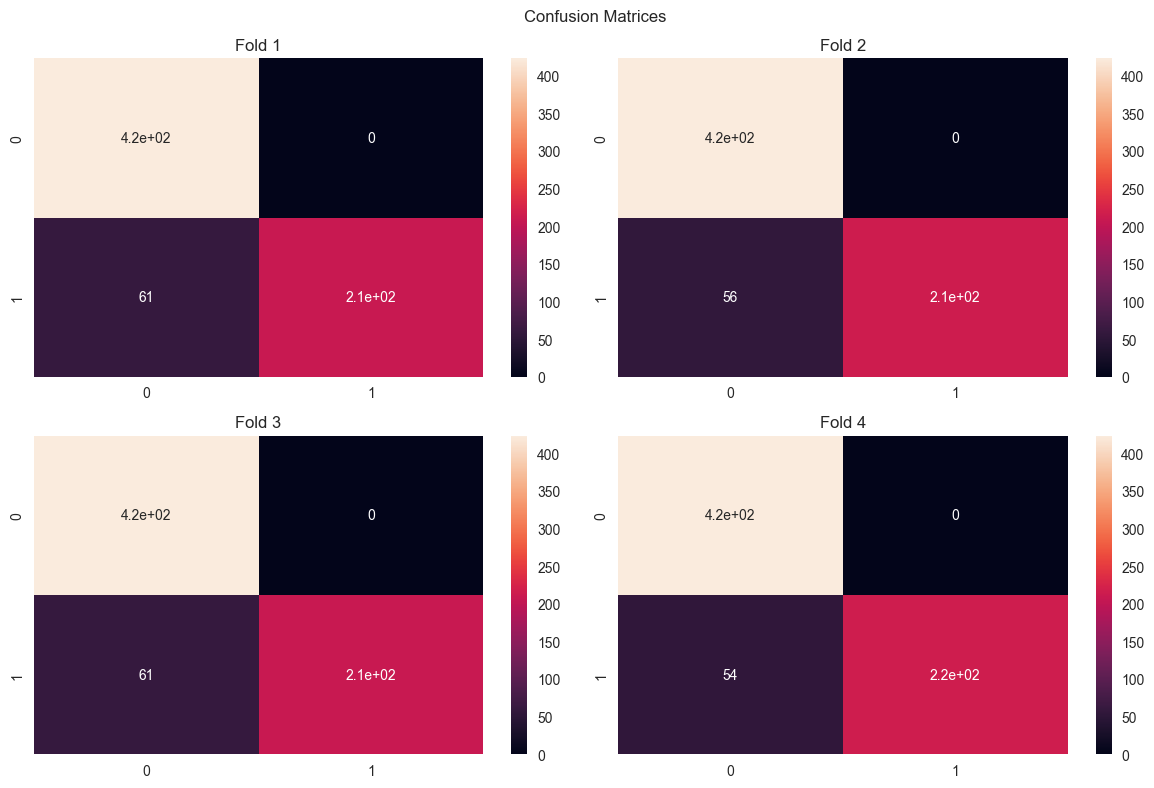

In [109]:
plotter.plot_confusion_matrix(all_models_6, X_test_vectors_6, y_test)

In [110]:
for i, trained_model in enumerate(all_models_6):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_6, y_test))

Model 1:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       423
           1       1.00      0.77      0.87       270

    accuracy                           0.91       693
   macro avg       0.94      0.89      0.90       693
weighted avg       0.92      0.91      0.91       693

Model 2:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       423
           1       1.00      0.79      0.88       270

    accuracy                           0.92       693
   macro avg       0.94      0.90      0.91       693
weighted avg       0.93      0.92      0.92       693

Model 3:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       423
           1       1.00      0.77      0.87       2

In [111]:
print_testing_loss_accuracy(all_models_6, X_test_vectors_6, y_test)

model: 1
22/22 [==============================] - 0s 2ms/step - loss: 0.7612 - accuracy: 0.9120
model: 2
22/22 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.9192
model: 3
22/22 [==============================] - 0s 2ms/step - loss: 0.8792 - accuracy: 0.9120
model: 4
22/22 [==============================] - 0s 2ms/step - loss: 0.7213 - accuracy: 0.9221
average testing loss: 0.765
average testing accuracy: 0.916


### Combination 7: (Processing - anonymization - Imbalancing)

In [112]:
X_train_processed_anonymized = preprocessor.preprocess_data(anonymized_facts_4)

In [113]:
X_test_processed_anonymized = preprocessor.preprocess_data(test_anonymized_facts_4)

In [114]:
embeddings_doc2vec_7, X_train_vectors_7 = preprocessor.convert_text_to_vectors_doc2vec(X_train_processed_anonymized)

In [115]:
X_test_vectors_7 = preprocessor.convert_text_to_vectors_doc2vec(X_test_processed_anonymized, train=False, embeddings_doc2vec=embeddings_doc2vec_7)

In [116]:
all_models_7, all_losses_7, all_val_losses_7, all_accuracies_7, all_val_accuracies_7 = train_model(build_doc2vec_model, X_train_vectors_7, y_train)

fold: 1
Epoch 1/30
33/33 [==============================] - 2s 10ms/step - loss: 0.6994 - accuracy: 0.6200 - val_loss: 0.6167 - val_accuracy: 0.6055
Epoch 2/30
33/33 [==============================] - 0s 5ms/step - loss: 0.4617 - accuracy: 0.7893 - val_loss: 0.4775 - val_accuracy: 0.8107
Epoch 3/30
33/33 [==============================] - 0s 5ms/step - loss: 0.3246 - accuracy: 0.8677 - val_loss: 0.3976 - val_accuracy: 0.8497
Epoch 4/30
33/33 [==============================] - 0s 4ms/step - loss: 0.2647 - accuracy: 0.8971 - val_loss: 0.4347 - val_accuracy: 0.8165
Epoch 5/30
33/33 [==============================] - 0s 4ms/step - loss: 0.1994 - accuracy: 0.9192 - val_loss: 0.4478 - val_accuracy: 0.8150
Epoch 6/30
33/33 [==============================] - 0s 5ms/step - loss: 0.1616 - accuracy: 0.9365 - val_loss: 0.4813 - val_accuracy: 0.8353
Epoch 7/30
33/33 [==============================] - 0s 5ms/step - loss: 0.1433 - accuracy: 0.9432 - val_loss: 0.3893 - val_accuracy: 0.8627
Epoch 8/30


In [117]:
avg_loss_hist_7, avg_val_loss_hist_7, avg_acc_hist_7, avg_val_acc_hist_7 = calculate_average_measures(all_losses_7, all_val_losses_7, all_accuracies_7, all_val_accuracies_7)

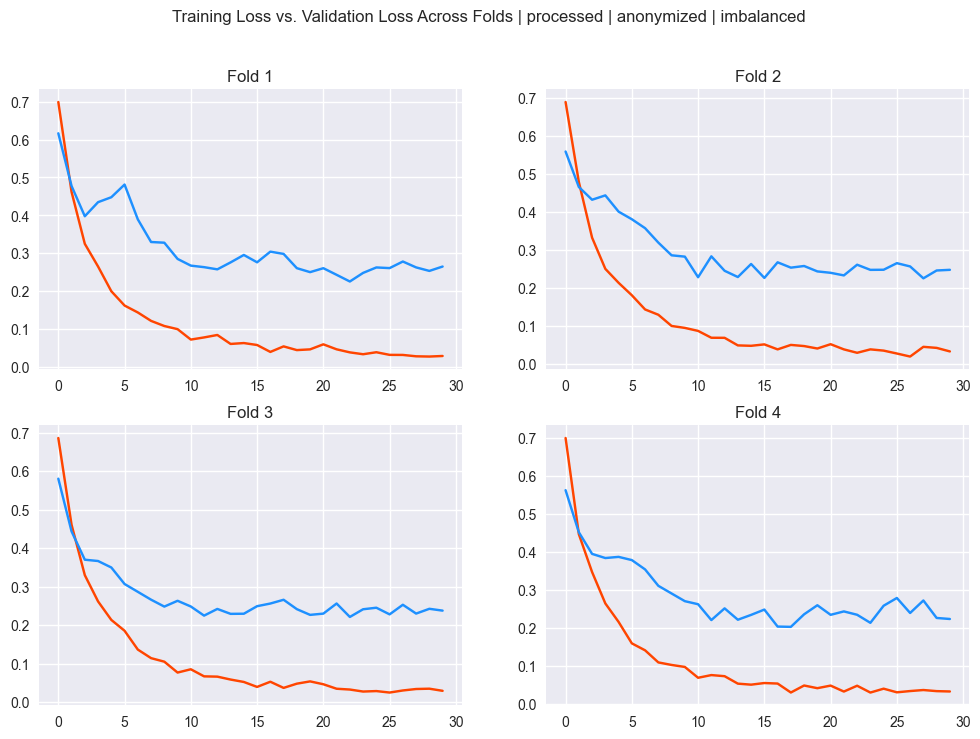

In [118]:
plotter.plot_subplots_curve(all_losses_7, all_val_losses_7, "Training Loss vs. Validation Loss Across Folds | processed | anonymized | imbalanced")

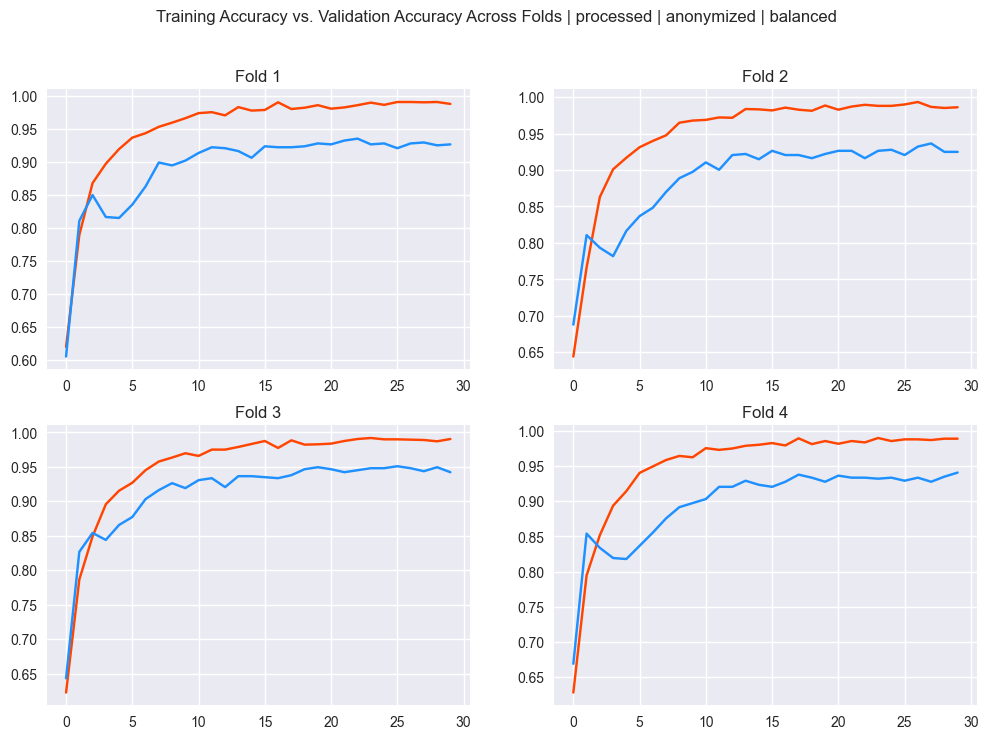

In [119]:
plotter.plot_subplots_curve(all_accuracies_7, all_val_accuracies_7, "Training Accuracy vs. Validation Accuracy Across Folds | processed | anonymized | balanced")

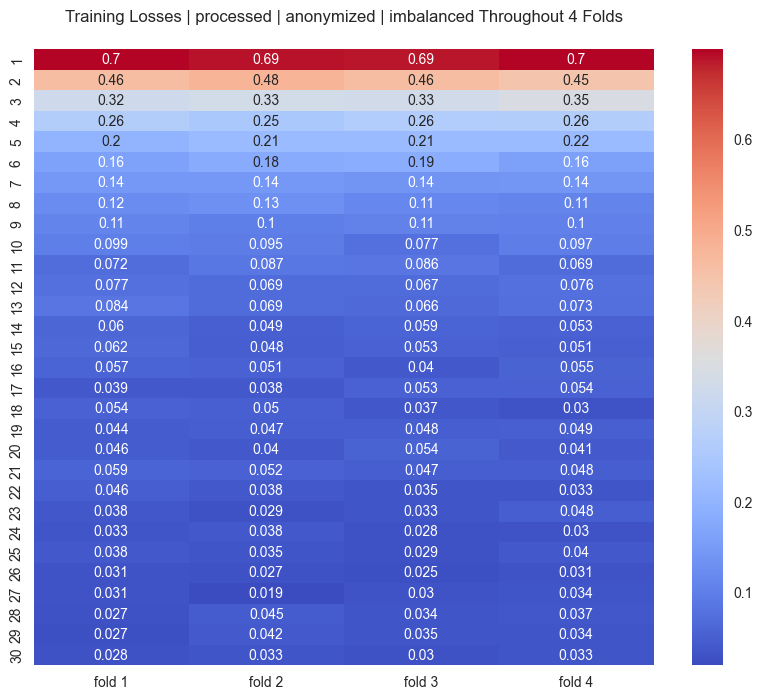

In [120]:
plotter.plot_heatmap(all_losses_7, "Training Losses | processed | anonymized | imbalanced")

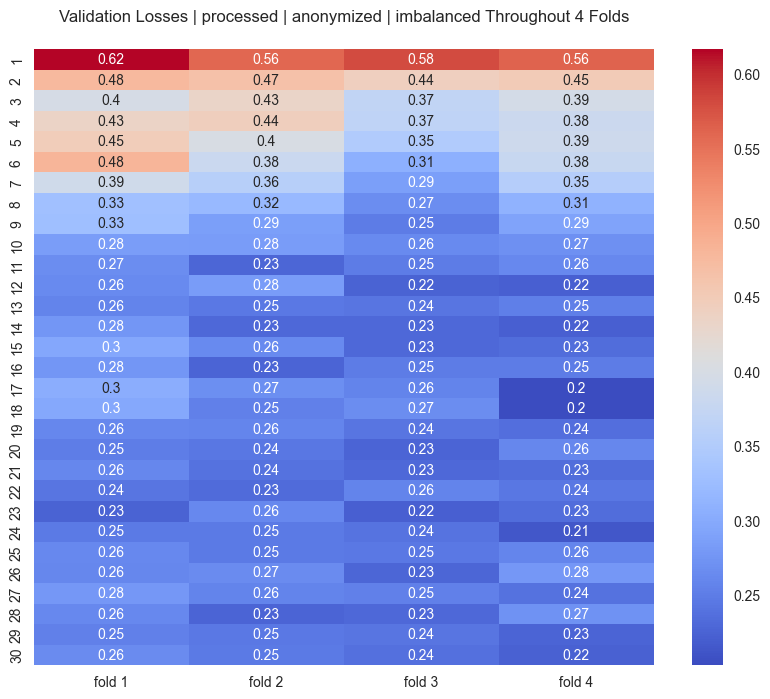

In [121]:
plotter.plot_heatmap(all_val_losses_7, "Validation Losses | processed | anonymized | imbalanced")

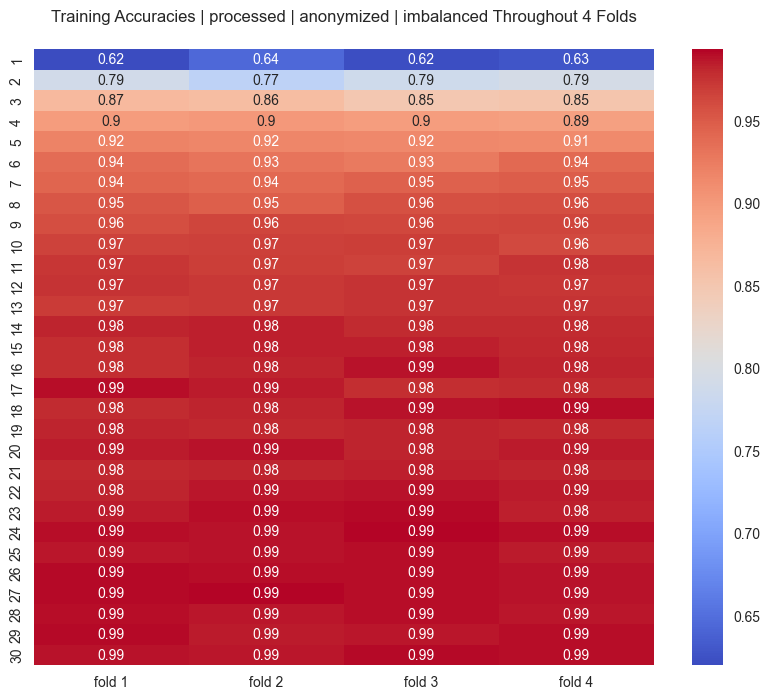

In [122]:
plotter.plot_heatmap(all_accuracies_7, "Training Accuracies | processed | anonymized | imbalanced")

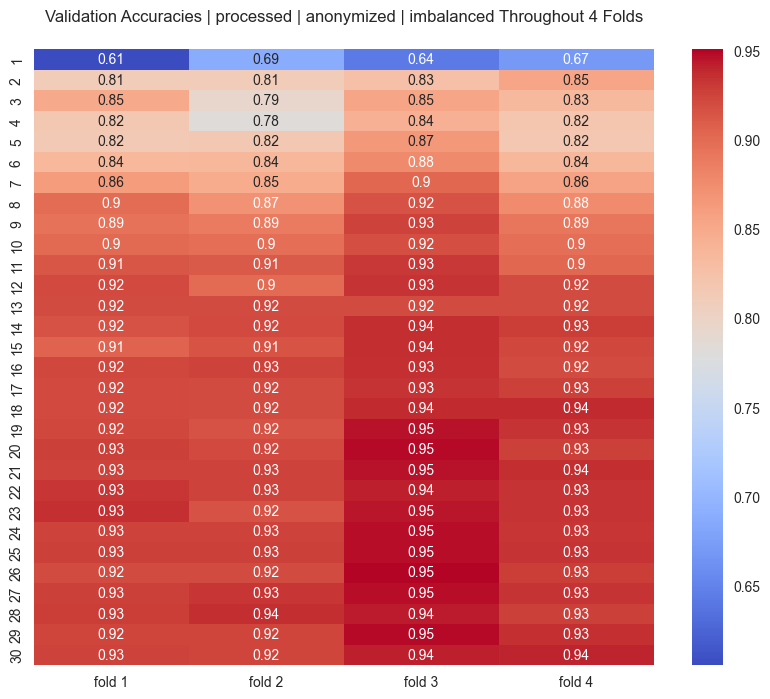

In [123]:
plotter.plot_heatmap(all_val_accuracies_7, "Validation Accuracies | processed | anonymized | imbalanced")

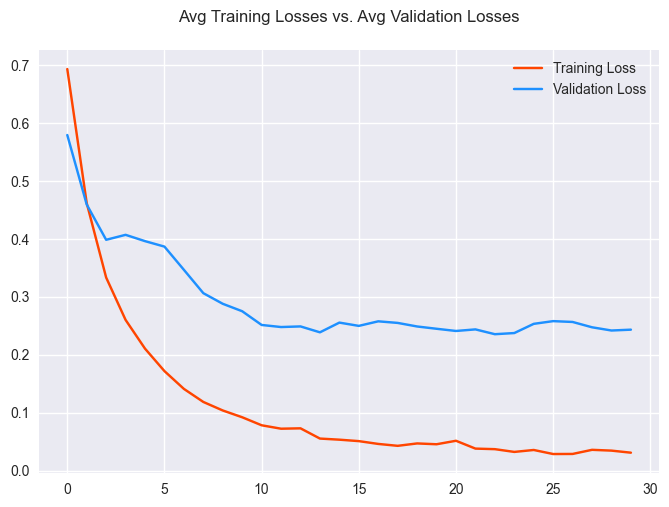

In [124]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_7, avg_val_loss_hist_7, "Training Loss", "Validation Loss")

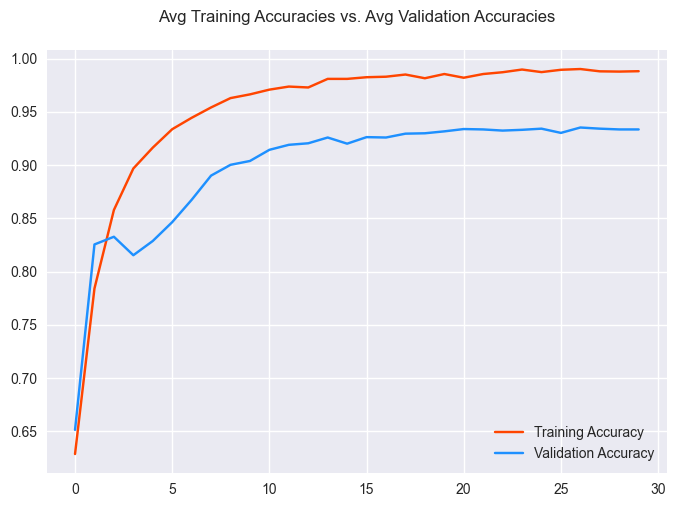

In [125]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_7, avg_val_acc_hist_7, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 0s 1ms/step


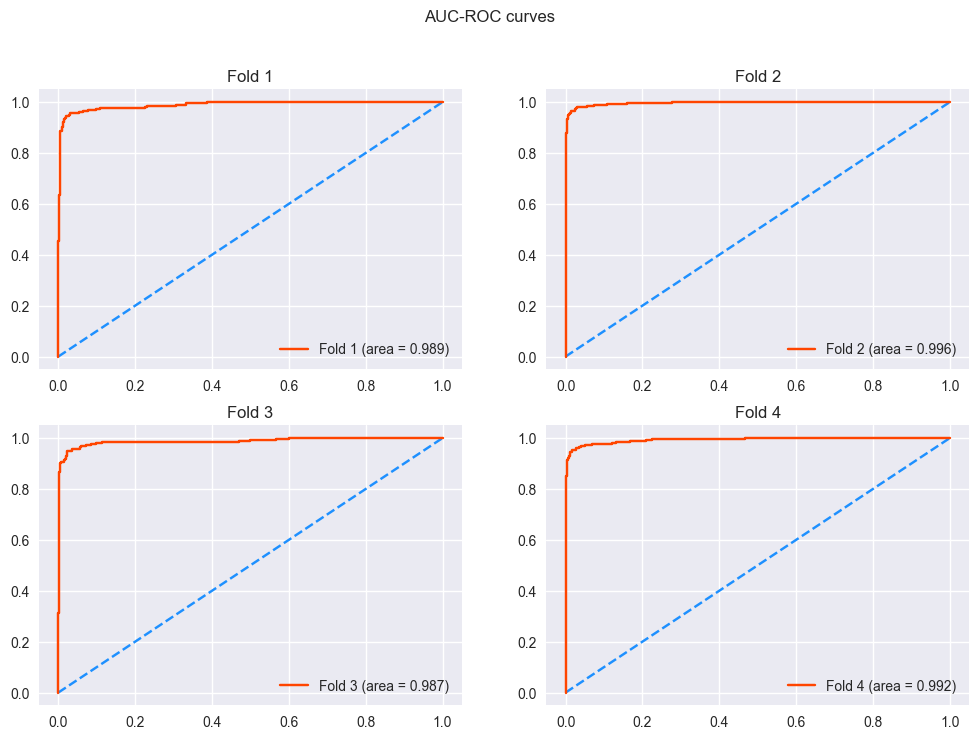

In [126]:
plotter.plot_roc_curve(all_models_7, X_test_vectors_7, y_test)

22/22 [==============================] - 0s 1ms/step


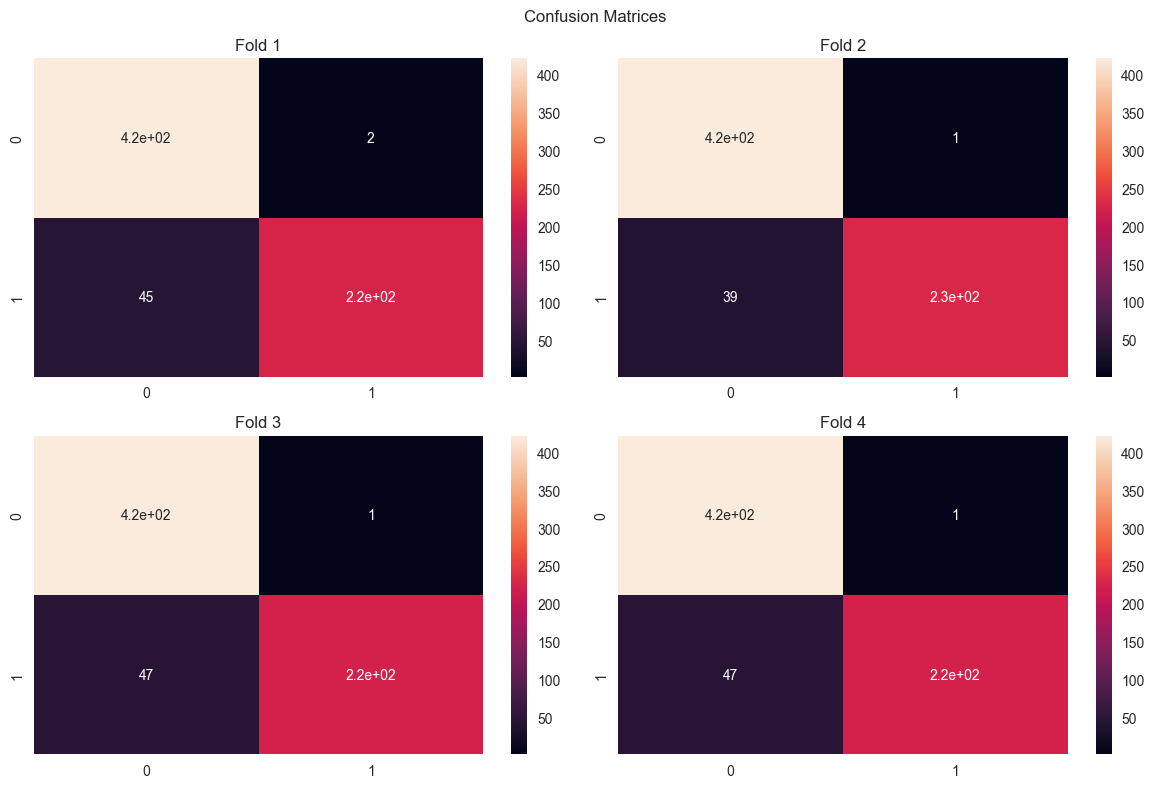

In [127]:
plotter.plot_confusion_matrix(all_models_7, X_test_vectors_7, y_test)

In [128]:
for i, trained_model in enumerate(all_models_7):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_7, y_test))

Model 1:
22/22 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       423
           1       0.99      0.83      0.91       270

    accuracy                           0.93       693
   macro avg       0.95      0.91      0.93       693
weighted avg       0.94      0.93      0.93       693

Model 2:
22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       423
           1       1.00      0.86      0.92       270

    accuracy                           0.94       693
   macro avg       0.96      0.93      0.94       693
weighted avg       0.95      0.94      0.94       693

Model 3:
22/22 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       423
           1       1.00      0.83      0.90       2

In [129]:
print_testing_loss_accuracy(all_models_7, X_test_vectors_7, y_test)

model: 1
22/22 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.9322
model: 2
22/22 [==============================] - 0s 1ms/step - loss: 0.2620 - accuracy: 0.9423
model: 3
22/22 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.9307
model: 4
22/22 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.9307
average testing loss: 0.342
average testing accuracy: 0.934


### Combination 8: (Processing - anonymization - Balancing)

In [130]:
processed_anonymized_balanced_df = preprocessor.balance_data(X_train_processed_anonymized, y_train)
processed_anonymized_balanced_df = processed_anonymized_balanced_df.rename(columns={0: "Facts"})
processed_anonymized_balanced_df.head()

Facts  winner_index
1555  _party_ partner _party_ sold construct equip b...             0
2125  censu congress increas _party_ ’ represent hou...             1
1720  j _party_ uari _party_ brought suit aga _party...             0
1680  board louisvil kentucki deni applic cassiu _pa...             0
1632  california labor code requir contractor subcon...             0

In [131]:
X_train_processed_anonymized_balanced = processed_anonymized_balanced_df["Facts"]
y_train_processed_anonymized_balanced = processed_anonymized_balanced_df["winner_index"]

In [132]:
embeddings_doc2vec_8, X_train_vectors_8 = preprocessor.convert_text_to_vectors_doc2vec(X_train_processed_anonymized_balanced)

In [133]:
X_test_vectors_8 = preprocessor.convert_text_to_vectors_doc2vec(X_test_processed_anonymized, train=False, embeddings_doc2vec=embeddings_doc2vec_8)

In [134]:
all_models_8, all_losses_8, all_val_losses_8, all_accuracies_8, all_val_accuracies_8 = train_model(build_doc2vec_model, X_train_vectors_8, y_train_processed_anonymized_balanced)

fold: 1
Epoch 1/30
40/40 [==============================] - 3s 9ms/step - loss: 0.5240 - accuracy: 0.7383 - val_loss: 0.4512 - val_accuracy: 0.8213
Epoch 2/30
40/40 [==============================] - 0s 5ms/step - loss: 0.2447 - accuracy: 0.9003 - val_loss: 0.2801 - val_accuracy: 0.8982
Epoch 3/30
40/40 [==============================] - 0s 5ms/step - loss: 0.1605 - accuracy: 0.9417 - val_loss: 0.2832 - val_accuracy: 0.8769
Epoch 4/30
40/40 [==============================] - 0s 5ms/step - loss: 0.1224 - accuracy: 0.9566 - val_loss: 0.2673 - val_accuracy: 0.8864
Epoch 5/30
40/40 [==============================] - 0s 5ms/step - loss: 0.1003 - accuracy: 0.9665 - val_loss: 0.2199 - val_accuracy: 0.9053
Epoch 6/30
40/40 [==============================] - 0s 5ms/step - loss: 0.0745 - accuracy: 0.9704 - val_loss: 0.2074 - val_accuracy: 0.9172
Epoch 7/30
40/40 [==============================] - 0s 5ms/step - loss: 0.0627 - accuracy: 0.9779 - val_loss: 0.1904 - val_accuracy: 0.9314
Epoch 8/30
4

In [135]:
avg_loss_hist_8, avg_val_loss_hist_8, avg_acc_hist_8, avg_val_acc_hist_8 = calculate_average_measures(all_losses_8, all_val_losses_8, all_accuracies_8, all_val_accuracies_8)

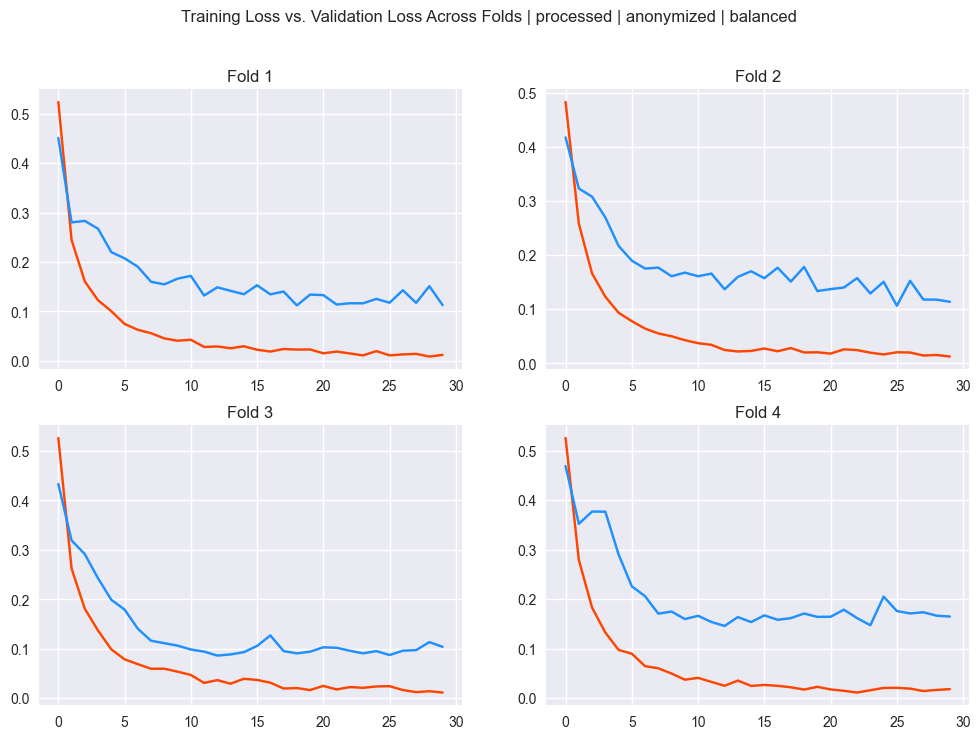

In [136]:
plotter.plot_subplots_curve(all_losses_8, all_val_losses_8, "Training Loss vs. Validation Loss Across Folds | processed | anonymized | balanced")

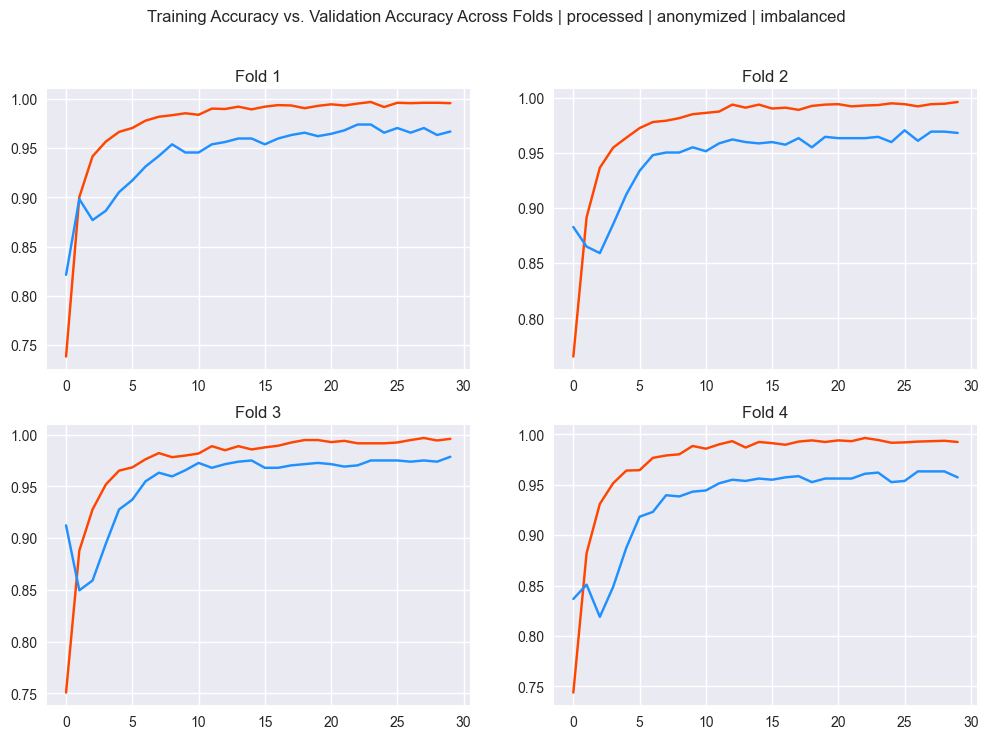

In [137]:
plotter.plot_subplots_curve(all_accuracies_8, all_val_accuracies_8, "Training Accuracy vs. Validation Accuracy Across Folds | processed | anonymized | imbalanced")

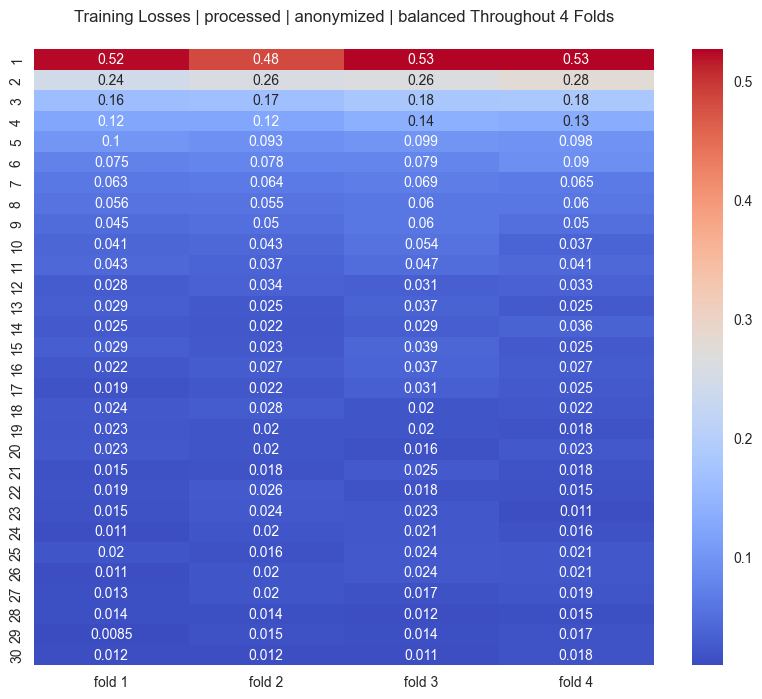

In [138]:
plotter.plot_heatmap(all_losses_8, "Training Losses | processed | anonymized | balanced")

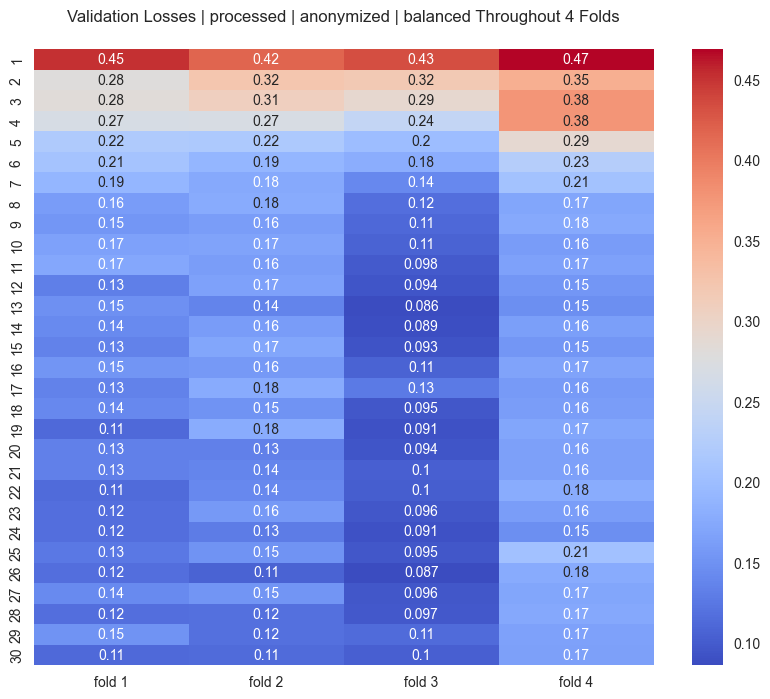

In [139]:
plotter.plot_heatmap(all_val_losses_8, "Validation Losses | processed | anonymized | balanced")

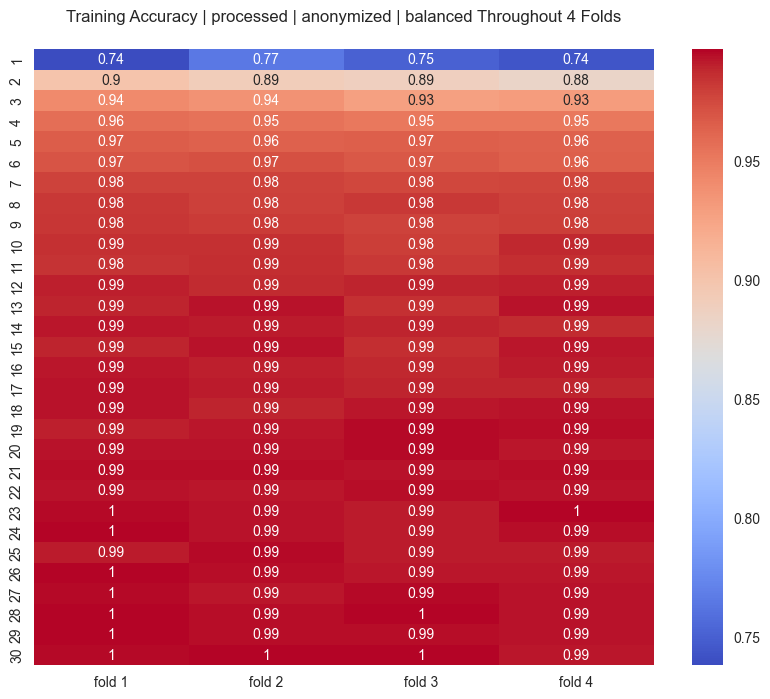

In [140]:
plotter.plot_heatmap(all_accuracies_8, "Training Accuracy | processed | anonymized | balanced")

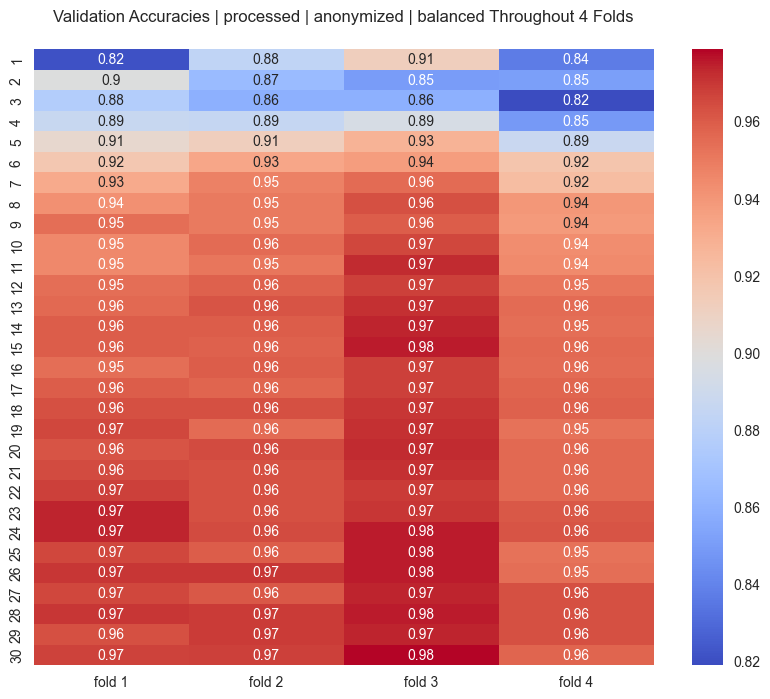

In [141]:
plotter.plot_heatmap(all_val_accuracies_8, "Validation Accuracies | processed | anonymized | balanced")

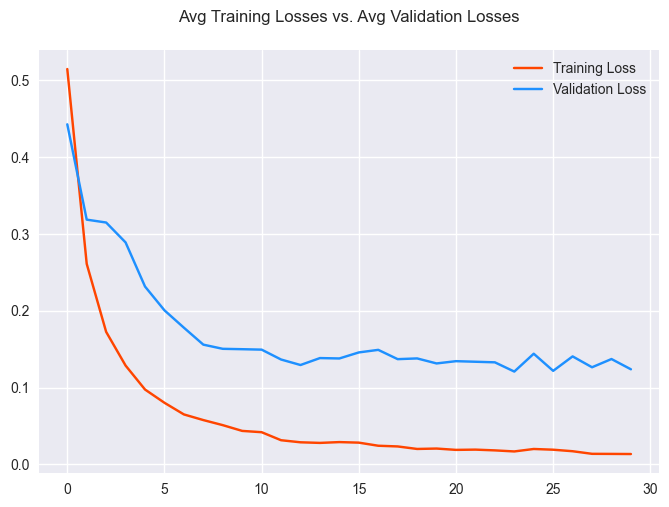

In [142]:
plotter.plot_average_curves("Avg Training Losses vs. Avg Validation Losses", avg_loss_hist_8, avg_val_loss_hist_8, "Training Loss", "Validation Loss")

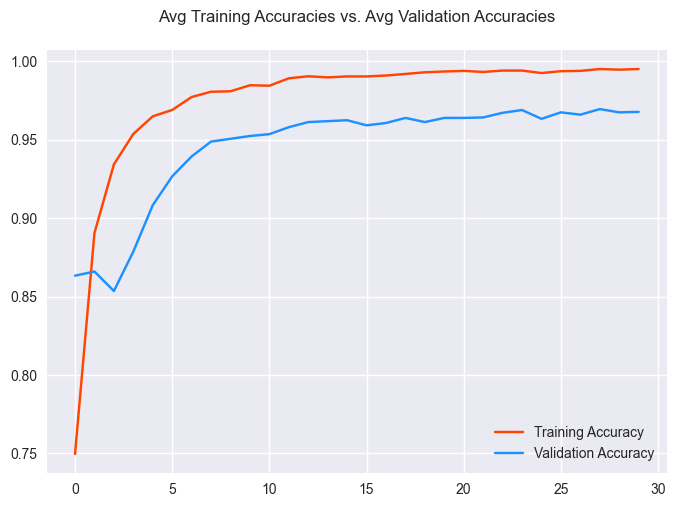

In [143]:
plotter.plot_average_curves("Avg Training Accuracies vs. Avg Validation Accuracies", avg_acc_hist_8, avg_val_acc_hist_8, "Training Accuracy", "Validation Accuracy")

22/22 [==============================] - 0s 1ms/step


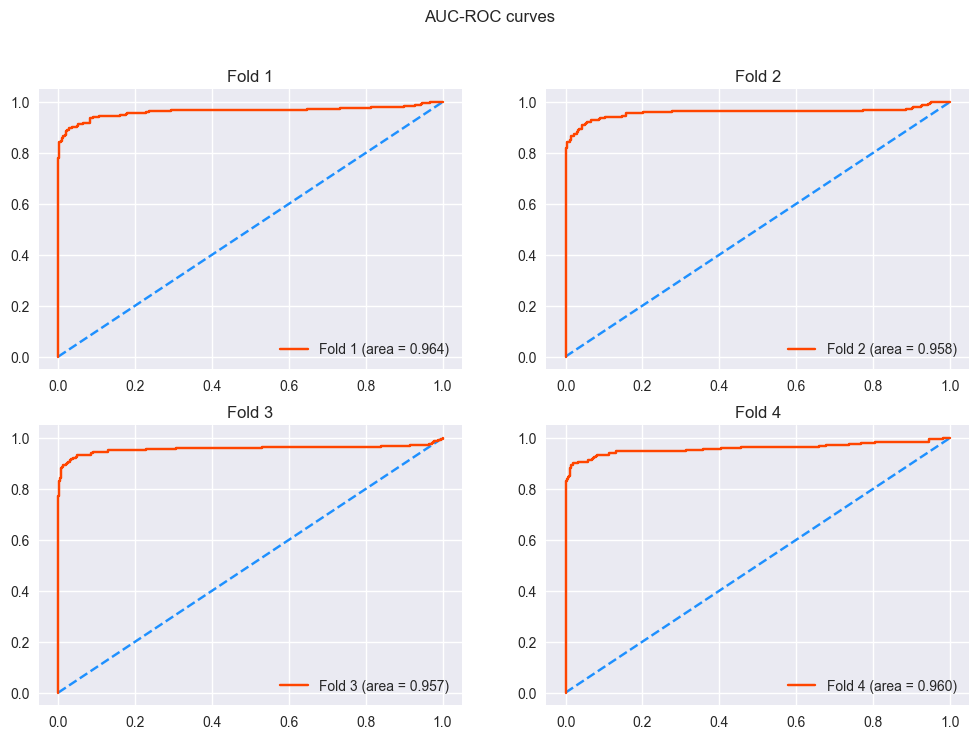

In [144]:
plotter.plot_roc_curve(all_models_8, X_test_vectors_8, y_test)

22/22 [==============================] - 0s 2ms/step


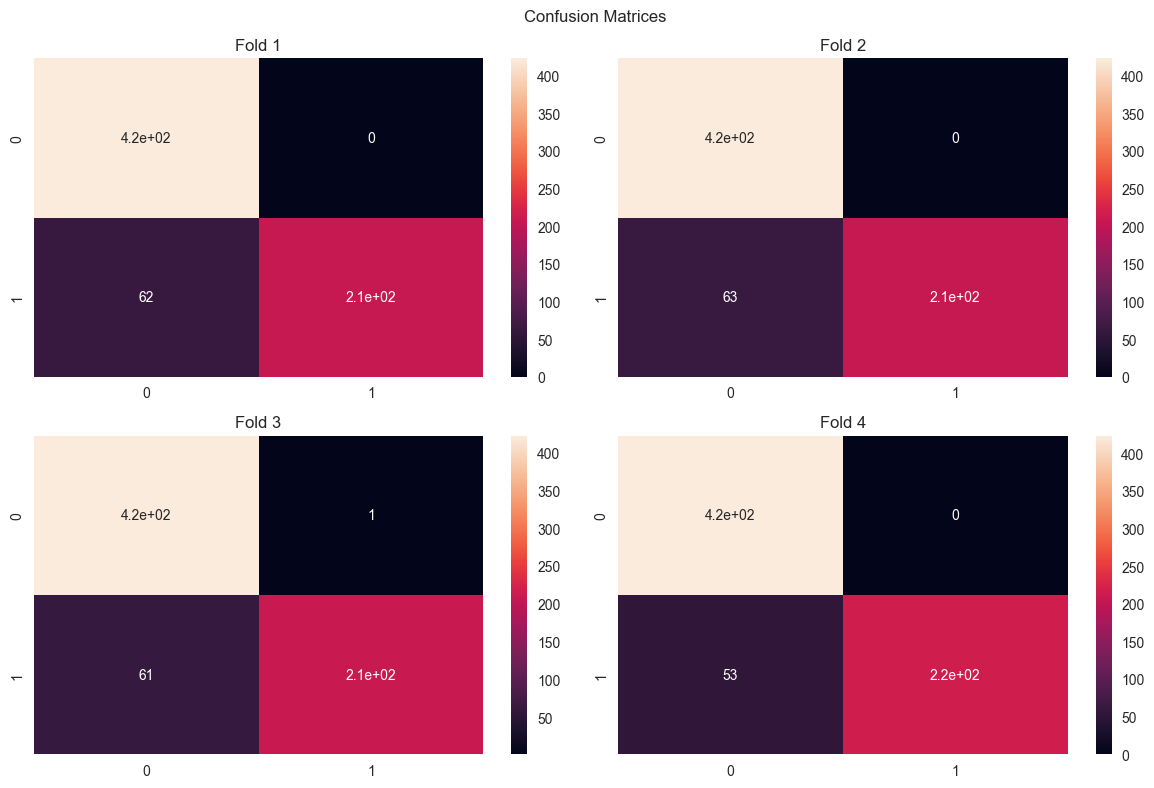

In [145]:
plotter.plot_confusion_matrix(all_models_8, X_test_vectors_8, y_test)

In [146]:
for i, trained_model in enumerate(all_models_8):
    print(f"Model {i+1}:")
    print(plotter.plot_classification_report(trained_model, X_test_vectors_8, y_test))

Model 1:
22/22 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       423
           1       1.00      0.77      0.87       270

    accuracy                           0.91       693
   macro avg       0.94      0.89      0.90       693
weighted avg       0.92      0.91      0.91       693

Model 2:
22/22 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       423
           1       1.00      0.77      0.87       270

    accuracy                           0.91       693
   macro avg       0.94      0.88      0.90       693
weighted avg       0.92      0.91      0.91       693

Model 3:
22/22 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       423
           1       1.00      0.77      0.87       2

In [147]:
print_testing_loss_accuracy(all_models_8, X_test_vectors_8, y_test)

model: 1
22/22 [==============================] - 0s 1ms/step - loss: 0.8395 - accuracy: 0.9105
model: 2
22/22 [==============================] - 0s 1ms/step - loss: 0.8468 - accuracy: 0.9091
model: 3
22/22 [==============================] - 0s 1ms/step - loss: 0.9209 - accuracy: 0.9105
model: 4
22/22 [==============================] - 0s 1ms/step - loss: 0.8251 - accuracy: 0.9235
average testing loss: 0.858
average testing accuracy: 0.913


### Saving Best Combination
There are 2 similar combinations which are: combination 1 (no preprocessing - no anonymization - imbalance) and combination 5 (preprocessing - no anonymization - imbalance). Each of them has 4 results depending on the folds. As a final result, the best model generalizing well on testing data with the highest testing accuracy is **the second model of the fifth combination** with **0.945** testing accuracy and **0.282** testing loss.

In [151]:
all_models_5[1].save("models/best_doc2vec_model.h5")

In [152]:
embeddings_doc2vec_5.save("models/best_doc2vec_embeddings")